#Task2:UNDERSTANDING PRODUCT CATEGORY & PRODUCT PERFORMANCE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import scipy as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import sklearn.metrics as metrics

In [3]:
trans_data_promo_store_product = pd.read_csv('trans_data_promo_store_product.csv')

In [4]:
for i in trans_data_promo_store_product:
    # if trans_data_promo_store_product['ProductCategory_Lvl2'].str[-2:] == "AC":
    #     trans_data_promo_store_product['ProductCategory_Lvl2'] = "Category AC"
    trans_data_promo_store_product.loc[trans_data_promo_store_product["ProductCategory_Lvl2"].str[-2:] == "aa", "ProductCategory_Lvl2"] = "Category AA"
    trans_data_promo_store_product.loc[trans_data_promo_store_product["ProductCategory_Lvl2"].str[-2:] == "ab", "ProductCategory_Lvl2"] = "Category AB"    
    trans_data_promo_store_product.loc[trans_data_promo_store_product["ProductCategory_Lvl2"].str[-2:] == "ad", "ProductCategory_Lvl2"] = "Category AD"    
    trans_data_promo_store_product.loc[trans_data_promo_store_product["ProductCategory_Lvl2"].str[-2:] == "ae", "ProductCategory_Lvl2"] = "Category AE"    

trans_data_promo_store_product['ProductCategory_Lvl2'] = trans_data_promo_store_product['ProductCategory_Lvl2'].str[-2:]
trans_data_promo_store_product.ProductCategory_Lvl2.unique()

array(['AC', 'AB', 'AA', 'AE', 'AD'], dtype=object)

In [5]:
trans_data_promo_store_product.ProductCategory_Lvl1.unique()

array(['Category A'], dtype=object)

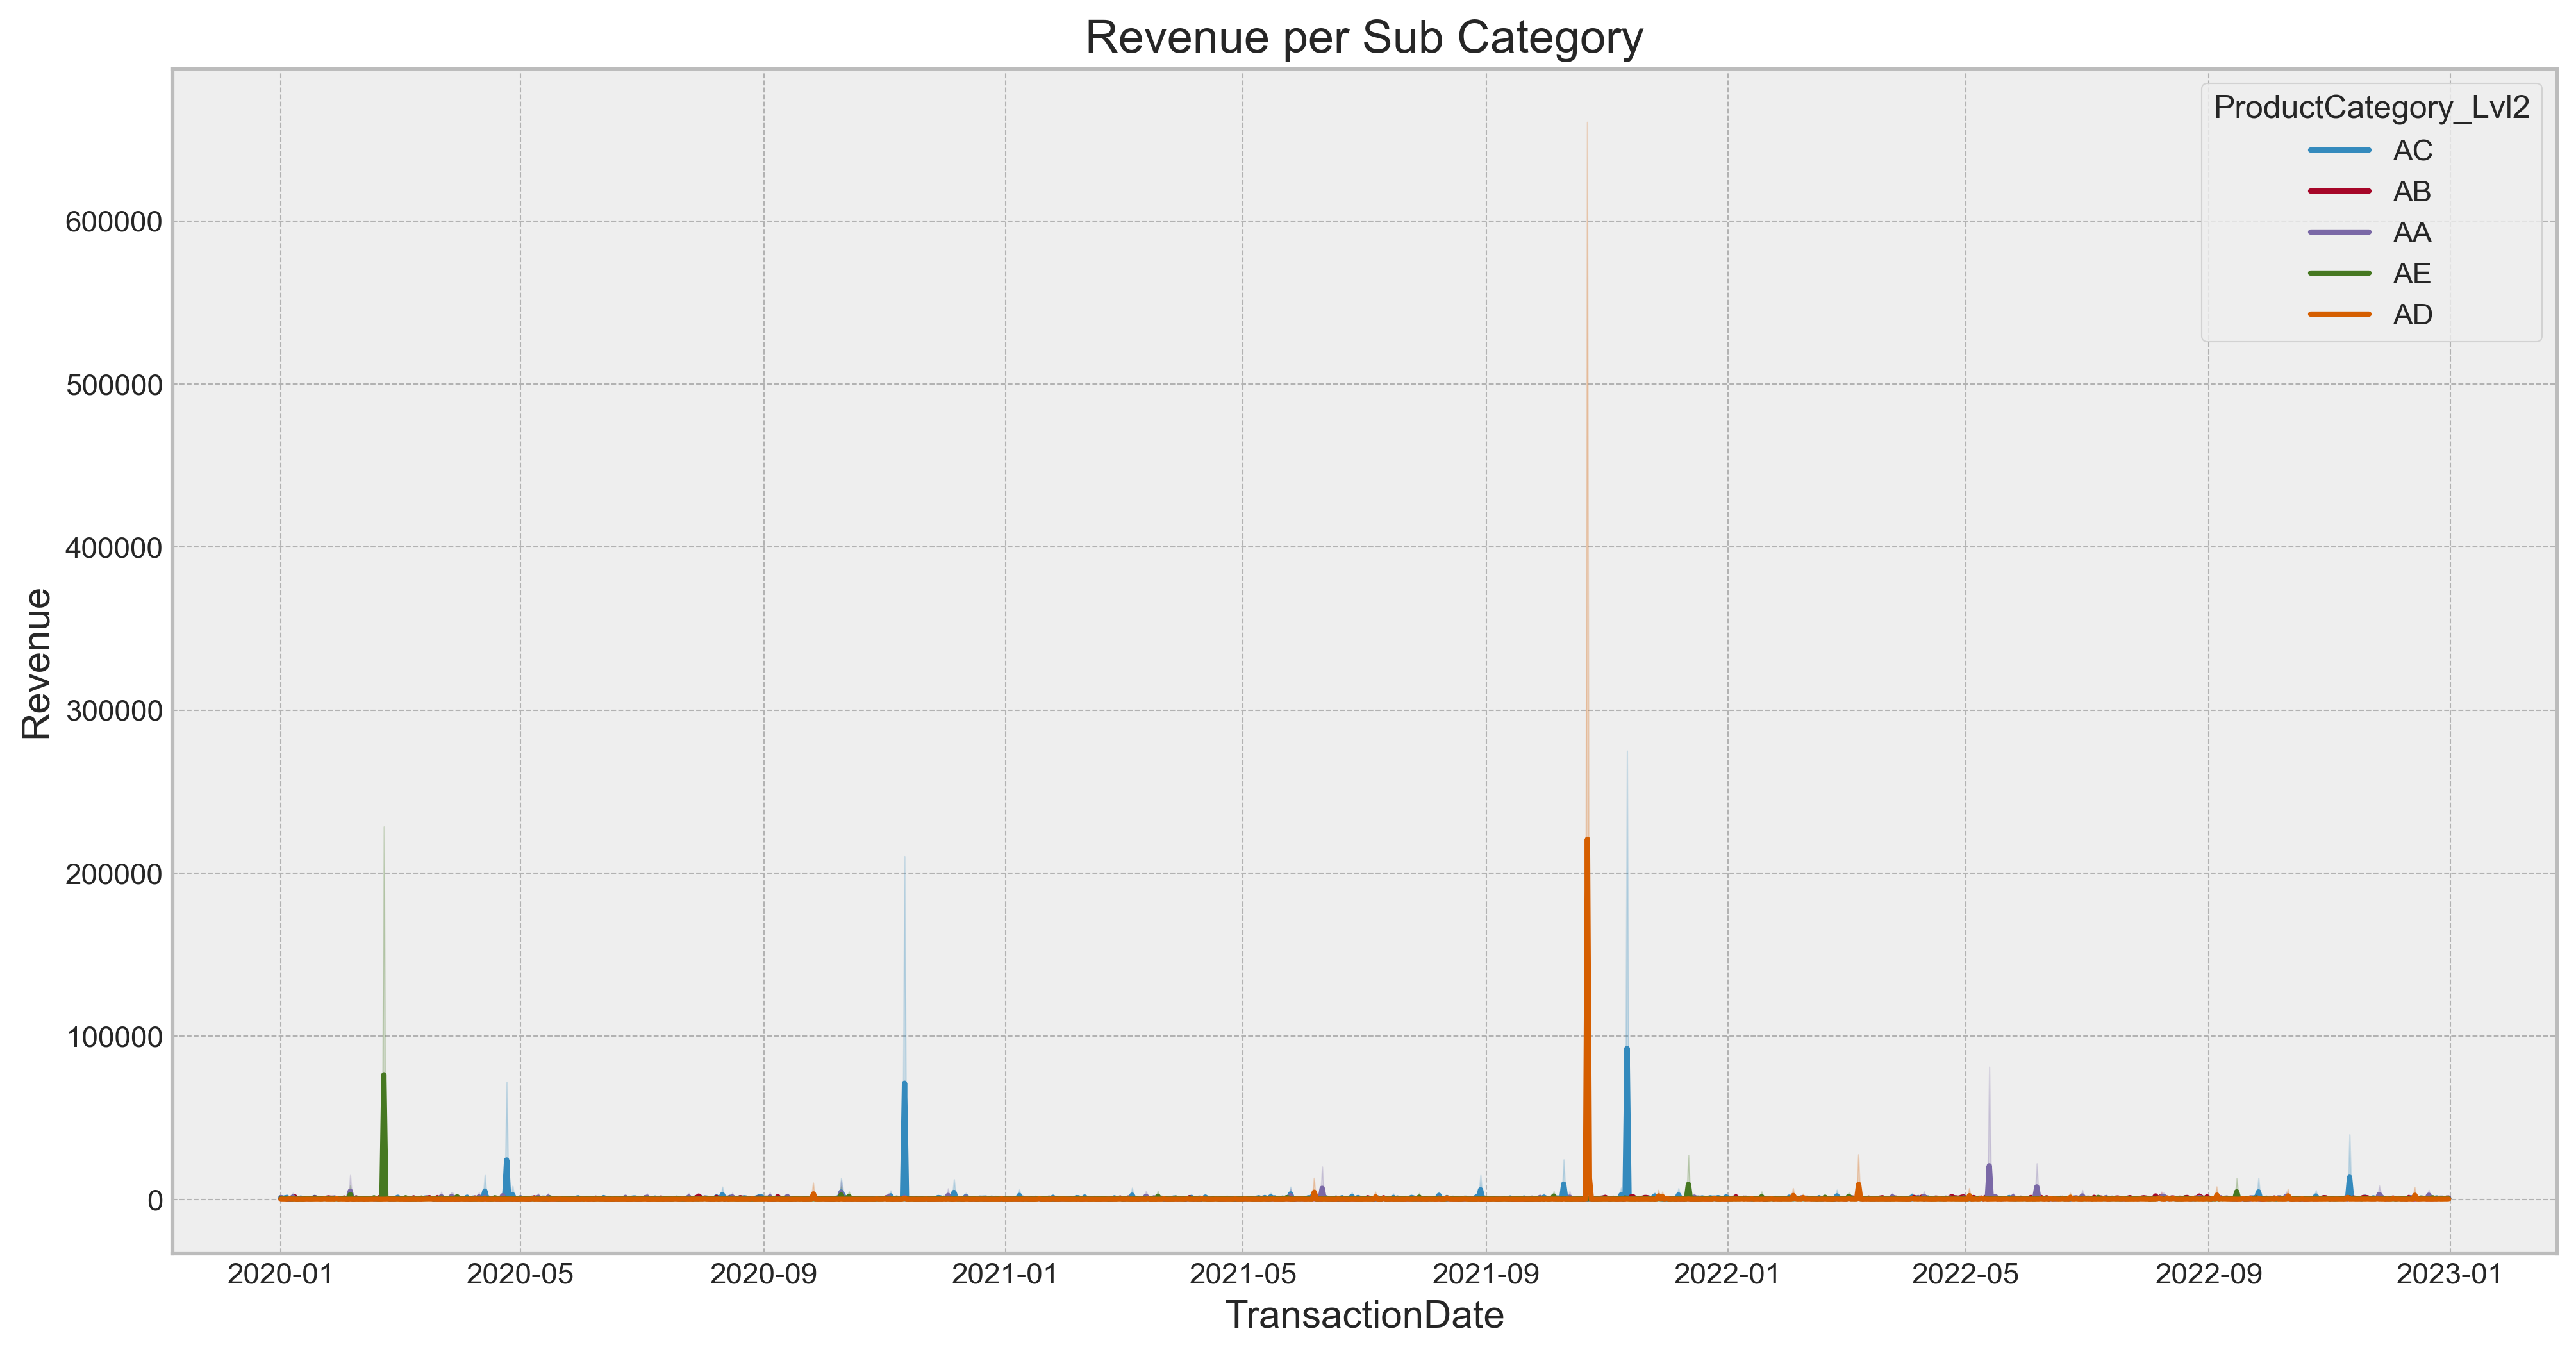

<Figure size 2400x1200 with 0 Axes>

In [152]:
# #overall cat A by sub_cat and rev
# sub_cat_rev = 

# # Step 1: Prepare data
# for row in trans_data_promo_store_product:
#     sub_cat = row['ProductCategory_Lvl2']
#     trans_rev = row['Trans_Sale_Amount']
#     if sub_cat not in sub_cat_rev:
#         sub_cat_rev[sub_cat] = trans_rev
#     else:
#         sub_cat_counts[sub_cat].append(trans_rev)
        
    

# # Step 2: Plot!
# plt.figure(figsize= (12, 6))
# plt.title('Total Revenue Per Sub Category')
# plt.bar(x= type_counts.keys(), height= type_counts.values())
# plt.ylabel('Total Revenue')
# plt.xlabel('Sub Category')
# plt.xticks(rotation = 90)
# plt.show()

# sub_cat_rev = trans_data_promo_store_product.groupby(['town','flat_type']).count()

# fig = plt.figure(figsize = (15, 5)) 

# complete_records_gb = complete_records.groupby(['flat_type']).count()
# complete_records_gb['resale_price']
# Total_By_Flat_Type = complete_records_gb['resale_price']
# Total_By_Flat_Type.columns = [['Flat_type', 'Total no. of units']]
# Total_By_Flat_Type.head()
# Total_By_Flat_Type.plot (kind = 'bar')
# plt.title ("Total Number of Sale Transactions by Flat Type")
# plt.xlabel("Flat Type")
# plt.ylabel("No. of Units")

# from datetime import datetime

trans_data_promo_store_product_subcats = trans_data_promo_store_product[["ProductCategory_Lvl2","TransactionDate","Trans_Sale_Amount"]]
# trans_data_promo_store_product_subcats["TransactionDate"] = datetime.strptime(trans_data_promo_store_product_subcats["TransactionDate"], "%Y/%m/%d")
# trans_data_promo_store_product_subcats.info()
# trans_data_promo_store_product_subcats = trans_data_promo_store_product_subcats.pivot_table(columns = "ProductCategory_Lvl2", 
#                                           index = "TransactionDate",
#                                           values = "Trans_Sale_Amount",
#                                           aggfunc = sum)

# fig = plt.figure(figsize=(16,16))
# fig.subplots_adjust(hspace =0.3)
# ax1 = fig.add_subplot(3,2,1)



# graph_1 = trans_data_promo_store_product_subcats.plot(ax=ax1, marker='o',ms=5)
# plt.legend(loc ="lower right",prop={"size": 11})
# graph_1.set(ylabel = "Total Revenue",
#             xlabel = "Time",
#            title= "Revenue per Sub Category")


# # Step 1: Prepare data
# dates = []
# rev = []
# sub_cats =[]
# for row in data:
#     town = row['town']
#     month = row['month']
#     price = float(row['resale_price'])
    
#     if town == chosen_town:
#         dates.append(datetime.strptime(row['month'], "%Y-%m"))
#         prices.append(price)
#         flat_types.append(row['flat_type'])
# # Step 2: Plot!

plt.figure(figsize = (16, 8))
plt.title('Revenue per Sub Category')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', hue = "ProductCategory_Lvl2", data = trans_data_promo_store_product_subcats)
plt.show()
plt.savefig("OWT2_1.png")


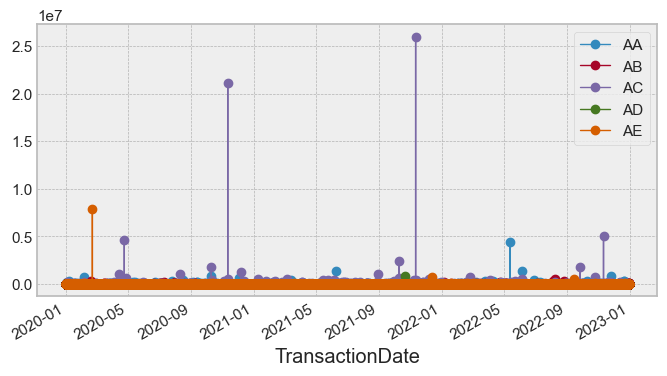

In [88]:
# trans_data_promo_store_product_subcats_line = trans_data_promo_store_product_subcats_line.sort_values(by=['TransactionDate'])
# trans_data_promo_store_product_subcats_line = trans_data_promo_store_product_subcats_line.set_index(['TransactionDate'])
# trans_data_promo_store_product_subcats = trans_data_promo_store_product_subcats.set_index('TransactionDate')
# trans_data_promo_store_product_subcats.sort_index(axis = 1)
trans_data_promo_store_product_subcats_line.groupby('ProductCategory_Lvl2')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
plt.show()
# trans_data_promo_store_product_subcats["TransactionDate"] = pd.to_datetime(trans_data_promo_store_product_subcats["TransactionDate"])
# trans_data_promo_store_product_subcats_line = trans_data_promo_store_product_subcats
# trans_data_promo_store_product_subcats_line
# trans_data_promo_store_product_subcats_line

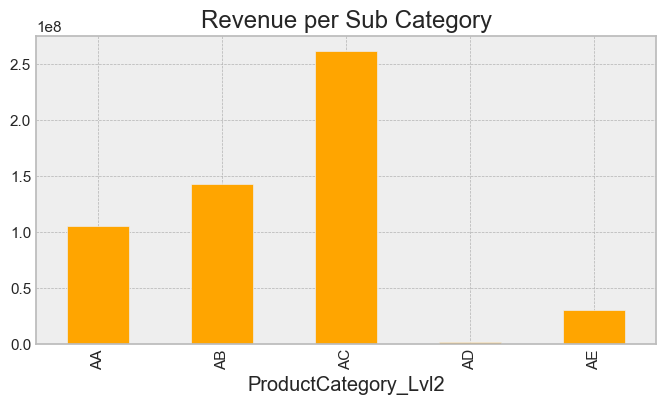

In [44]:
# fig = plt.figure(figsize = (15, 5)) 

# trans_data_promo_store_product_subcats.plot (kind = 'bar')
# plt.title ("Revenue per Sub Category")
# plt.xlabel("TransactionDate")
# plt.ylabel("No. of Units")

# subcat_total = {}

# # Step 1: Prepare data
# for row in trans_data_promo_store_product_subcats:
#     subcat = row['town']
#     if town not in town_counts:
#         town_counts[town] = 1
#     else:
#         town_counts[town] += 1
        
    

# # Step 2: Plot!
# plt.figure(figsize= (12, 6))
# plt.title('Number of Resale Flats Sold per Town')
# plt.bar(x= town_counts.keys(), height= town_counts.values())


# # town_counts_descending = {k: v for k, v in sorted(town_counts.items(), reverse = True, key = lambda)}
# # plt.bar = (x = town_counts_descending.keys(), height = town_counts_descending.values())

# plt.ylabel('Number of Flats Sold')
# plt.xlabel('Town')
# plt.xticks(rotation = 90)
# plt.show()
trans_data_promo_store_product_subcats_SCrev = trans_data_promo_store_product_subcats.groupby("ProductCategory_Lvl2")["Trans_Sale_Amount"].sum()
trans_data_promo_store_product_subcats_SCrev.plot(
    kind='bar', 
    x='ProductCategory_Lvl2', 
    y='Trans_Sale_Amount', 
    color='orange', 
    title='Revenue per Sub Category',
#     ylim=(10,18) 
)
plt.show()

<AxesSubplot:xlabel='TransactionDate'>

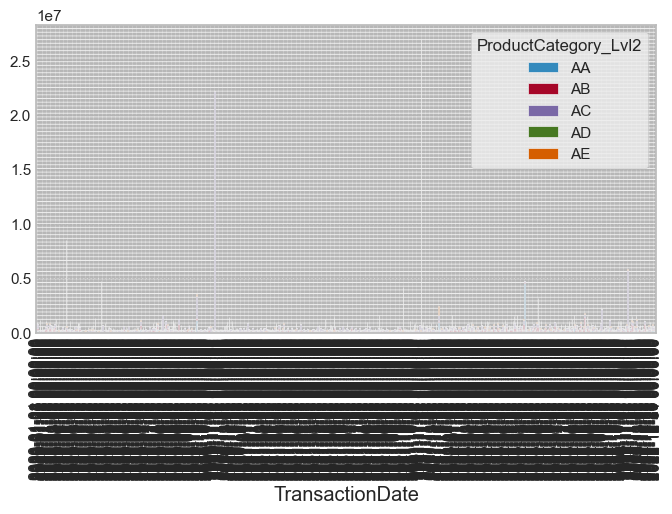

In [84]:
# trans_data_promo_store_product_subcats.groupby(['TransactionDate', 'ProductCategory_Lvl2']).sum().unstack().plot(kind='bar',y='Trans_Sale_Amount', stacked=True)
# trans_data_promo_store_product_subcats_area = pd.trans_data_promo_store_product_subcats(['ProductCategory_Lvl2','Trans_Sale_Amount']

/Users/andrewchoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'AC'),
 Text(1, 0, 'AB'),
 Text(2, 0, 'AA'),
 Text(3, 0, 'AE'),
 Text(4, 0, 'AD')]

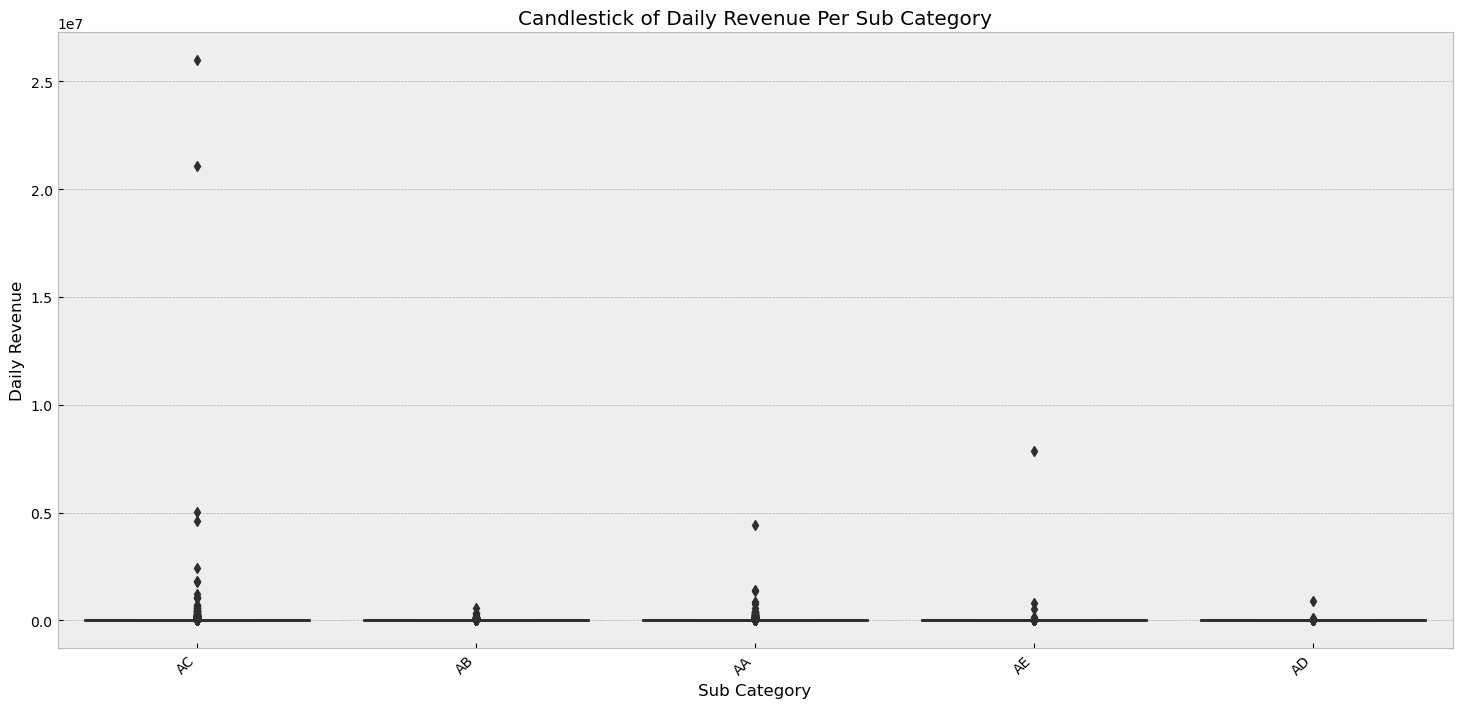

In [9]:
plt.style.use('bmh')
fig = plt.figure(figsize = (18, 8)) 

graph_1 = sns.boxplot(trans_data_promo_store_product_subcats.ProductCategory_Lvl2, trans_data_promo_store_product_subcats.Trans_Sale_Amount)
graph_1.set(title = "Candlestick of Daily Revenue Per Sub Category",
            xlabel = "Sub Category",
            ylabel = "Daily Revenue")

graph_1.set_xticklabels(graph_1.get_xticklabels(),
                        rotation = 45,
                        horizontalalignment = "right")

In [10]:
trans_data_promo_store_product_subcats.sort_values(by=['Trans_Sale_Amount'], ascending = False)
# b_plot = df.trans_data_promo_store_product_subcats(column = ['ProductCategory_Lvl2']) 
# b_plot.plot()
# plot.show()

ProductCategory_Lvl2 TransactionDate  Trans_Sale_Amount
451919                   AC      2021-11-11       2.596883e+07
374609                   AC      2020-11-11       2.109329e+07
482928                   AE      2020-02-22       7.831217e+06
29634                    AC      2022-11-11       5.032823e+06
663464                   AC      2020-04-24       4.611357e+06
...                     ...             ...                ...
978797                   AB      2020-11-12      -2.784144e+01
280495                   AA      2020-11-26      -2.821055e+01
519820                   AB      2020-04-12      -4.745700e+01
304733                   AA      2020-03-12      -5.536650e+01
748508                   AA      2020-03-08      -1.065146e+02

[1064572 rows x 3 columns]

In [11]:
trans_data_promo_store_product_subcats_ex_outliers = trans_data_promo_store_product_subcats.loc[trans_data_promo_store_product_subcats["Trans_Sale_Amount"] <= 0.5e+07]

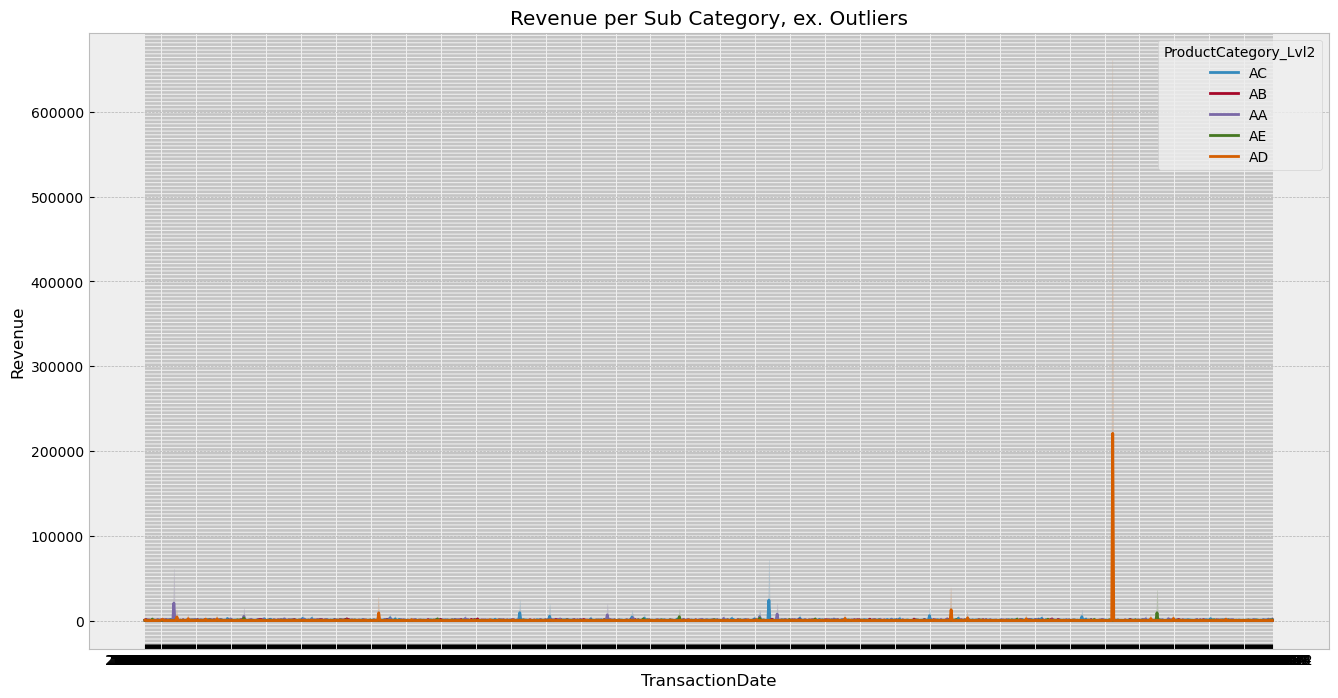

In [12]:
plt.figure(figsize = (16, 8))
plt.title('Revenue per Sub Category, ex. Outliers')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', hue = "ProductCategory_Lvl2", data = trans_data_promo_store_product_subcats_ex_outliers)
plt.show()

/Users/andrewchoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'AC'),
 Text(1, 0, 'AB'),
 Text(2, 0, 'AA'),
 Text(3, 0, 'AE'),
 Text(4, 0, 'AD')]

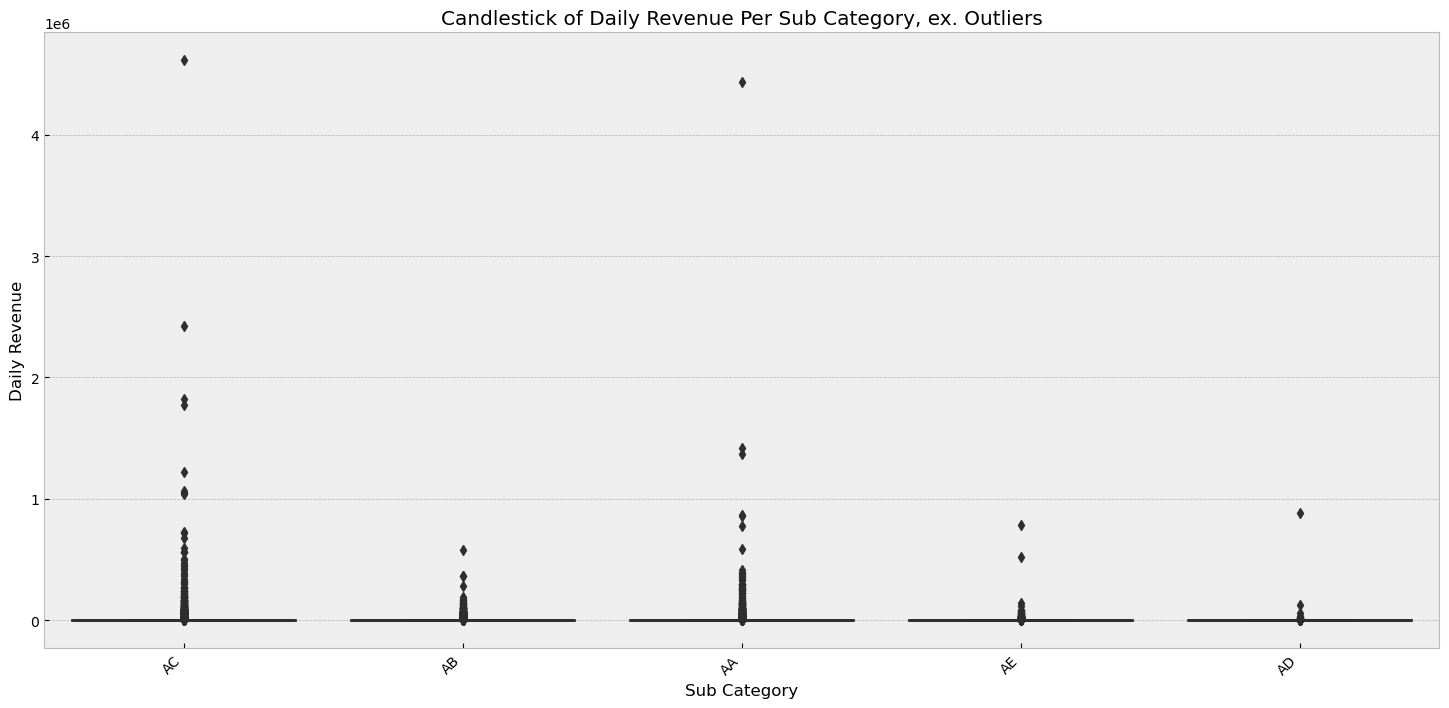

In [13]:
plt.style.use('bmh')
fig = plt.figure(figsize = (18, 8)) 

graph_1 = sns.boxplot(trans_data_promo_store_product_subcats_ex_outliers.ProductCategory_Lvl2, trans_data_promo_store_product_subcats_ex_outliers.Trans_Sale_Amount)
graph_1.set(title = "Candlestick of Daily Revenue Per Sub Category, ex. Outliers",
            xlabel = "Sub Category",
            ylabel = "Daily Revenue")

graph_1.set_xticklabels(graph_1.get_xticklabels(),
                        rotation = 45,
                        horizontalalignment = "right")

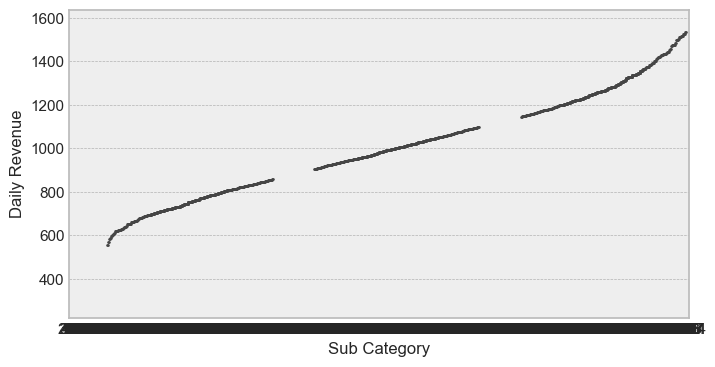

In [106]:
# trans_data_promo_store_product_subcats_bpt= trans_data_promo_store_product_subcats.groupby(['TransactionDate']).sum()
# trans_data_promo_store_product_subcats_bpt
# trans_data_promo_store_product_subcats_bp = pd.trans_data_promo_store_product_subcats(data = 'Trans_Sale_Amount'(size=(4,4)), columns = ['ProductCategory_Lvl2'])
# trans_data_promo_store_product_subcats.boxplot()
trans_data_promo_store_product_subcats_BP = trans_data_promo_store_product_subcats.groupby(['TransactionDate']).count()

ax = sns.boxplot(data=trans_data_promo_store_product_subcats_BP, x='ProductCategory_Lvl2',y ='Trans_Sale_Amount')

plt.rcParams["figure.dpi"] = 300
plt.xlabel("Sub Category", size=12)
plt.ylabel("Daily Revenue", size=12)
plt.show()

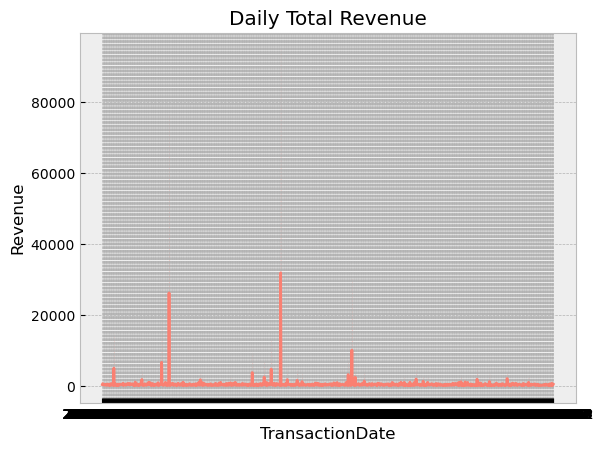

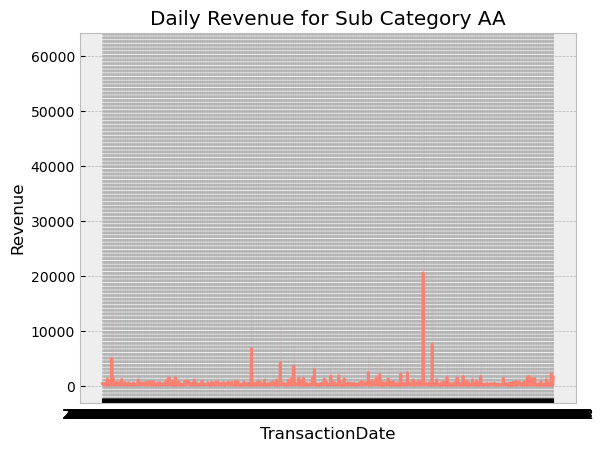

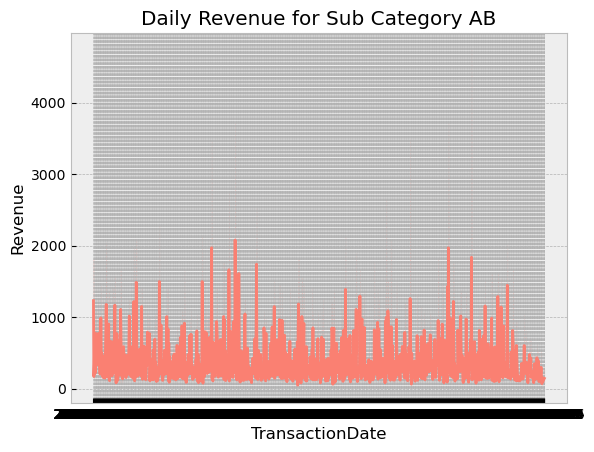

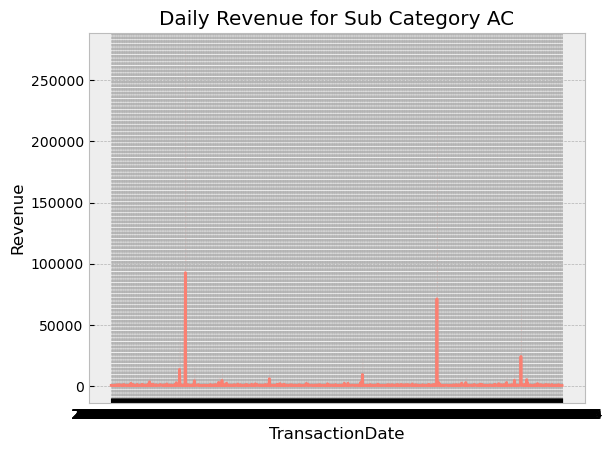

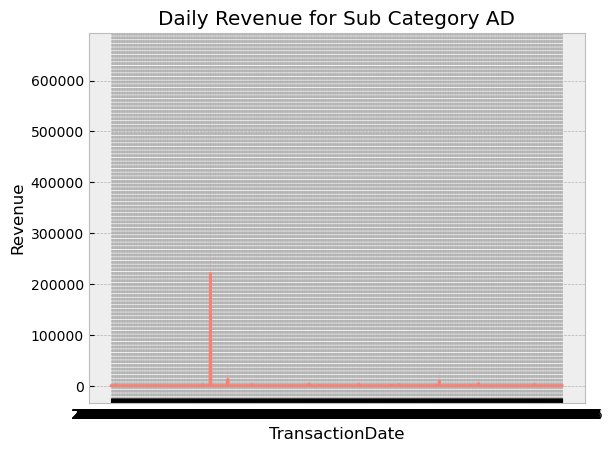

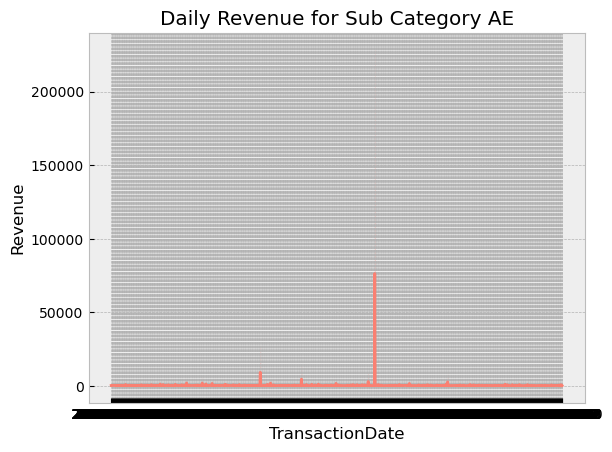

In [14]:
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
# cond_AA = trans_data_promo_store_product_subcats_AA['ProductCategory_Lvl2'] == 'AA'    
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats_AA[cond_AA]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Total Revenue')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats)
plt.show()


trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
cond_AA = trans_data_promo_store_product_subcats_AA['ProductCategory_Lvl2'] == 'AA'    
trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats_AA[cond_AA]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Revenue for Sub Category AA')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AA)
plt.show()


trans_data_promo_store_product_subcats_AB = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
cond_AB = trans_data_promo_store_product_subcats_AB['ProductCategory_Lvl2'] == 'AB'    
trans_data_promo_store_product_subcats_AB = trans_data_promo_store_product_subcats_AB[cond_AB]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Revenue for Sub Category AB')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AB)
plt.show()


trans_data_promo_store_product_subcats_AC = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
cond_AC = trans_data_promo_store_product_subcats_AC['ProductCategory_Lvl2'] == 'AC'    
trans_data_promo_store_product_subcats_AC = trans_data_promo_store_product_subcats_AC[cond_AC]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Revenue for Sub Category AC')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AC)
plt.show()


trans_data_promo_store_product_subcats_AD = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
cond_AD = trans_data_promo_store_product_subcats_AD['ProductCategory_Lvl2'] == 'AD'    
trans_data_promo_store_product_subcats_AD = trans_data_promo_store_product_subcats_AD[cond_AD]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Revenue for Sub Category AD')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AD)
plt.show()


trans_data_promo_store_product_subcats_AE = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
cond_AE = trans_data_promo_store_product_subcats_AE['ProductCategory_Lvl2'] == 'AE'    
trans_data_promo_store_product_subcats_AE = trans_data_promo_store_product_subcats_AE[cond_AE]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Revenue for Sub Category AE')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AE)
plt.show()

In [15]:
# trans_data_promo_store_product_subcats_AB = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
# cond_AB = trans_data_promo_store_product_subcats_AB['ProductCategory_Lvl2'] == 'AB'    
# trans_data_promo_store_product_subcats_AB = trans_data_promo_store_product_subcats_AB[cond_AB]
# # trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# # trans_data_promo_store_product_subcats_AA
# plt.title('Daily Revenue for Sub Category AB')
# plt.ylabel('Revenue')
# sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AB)
# plt.show()

In [16]:
# trans_data_promo_store_product_subcats_AC = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
# cond_AC = trans_data_promo_store_product_subcats_AC['ProductCategory_Lvl2'] == 'AC'    
# trans_data_promo_store_product_subcats_AC = trans_data_promo_store_product_subcats_AC[cond_AC]
# # trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# # trans_data_promo_store_product_subcats_AA
# plt.title('Daily Revenue for Sub Category AC')
# plt.ylabel('Revenue')
# sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AC)
# plt.show()

In [17]:
# trans_data_promo_store_product_subcats_AD = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
# cond_AD = trans_data_promo_store_product_subcats_AD['ProductCategory_Lvl2'] == 'AD'    
# trans_data_promo_store_product_subcats_AD = trans_data_promo_store_product_subcats_AD[cond_AD]
# # trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# # trans_data_promo_store_product_subcats_AA
# plt.title('Daily Revenue for Sub Category AD')
# plt.ylabel('Revenue')
# sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AD)
# plt.show()

In [18]:
# trans_data_promo_store_product_subcats_AE = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
# cond_AE = trans_data_promo_store_product_subcats_AE['ProductCategory_Lvl2'] == 'AE'    
# trans_data_promo_store_product_subcats_AE = trans_data_promo_store_product_subcats_AE[cond_AE]
# # trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# # trans_data_promo_store_product_subcats_AA
# plt.title('Daily Revenue for Sub Category AE')
# plt.ylabel('Revenue')
# sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_subcats_AE)
# plt.show()

In [19]:
trans_data_promo_store_product['Region_Lvl1'] = trans_data_promo_store_product['Region_Lvl1'].str[-1:]
trans_data_promo_store_product['Region_Lvl2'] = trans_data_promo_store_product['Region_Lvl2'].str.replace(r'\D', '')
# trans_data_promo_store_product['Region_Lvl2'] = trans_data_promo_store_product['Region_Lvl1'].astype(str) + trans_data_promo_store_product['Region_Lvl2']
for i in trans_data_promo_store_product:
    trans_data_promo_store_product.loc[trans_data_promo_store_product["Region_Lvl1"] == "e", "Region_Lvl1"] = "O"
trans_data_promo_store_product['Region_Lvl2'] = trans_data_promo_store_product['Region_Lvl1'].astype(str) + trans_data_promo_store_product['Region_Lvl2']
# trans_data_promo_store_product.drop(columns = ['Region_Lvl1'])
# trans_data_promo_store_product['ProductCategory_Lvl2'] = trans_data_promo_store_product['ProductCategory_Lvl2'].str[-2:]
# print(trans_data_promo_store_product.Region_Lvl1.unique())
# print(trans_data_promo_store_product.Region_Lvl2.unique())
# trans_data_promo_store_product

/var/folders/bn/ssh2q0ws68jgts8x4b_2qxqw0000gn/T/ipykernel_19106/3342397405.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  trans_data_promo_store_product['Region_Lvl2'] = trans_data_promo_store_product['Region_Lvl2'].str.replace(r'\D', '')


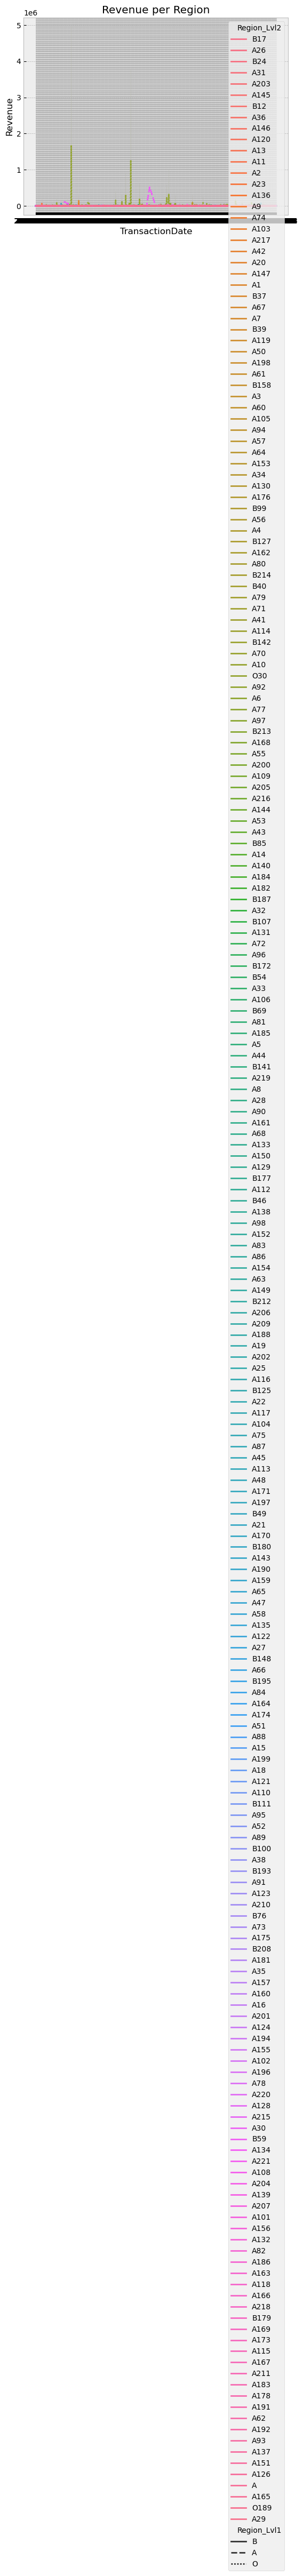

In [20]:
trans_data_promo_store_product_regions = trans_data_promo_store_product[["Region_Lvl1", "Region_Lvl2","TransactionDate","Trans_Sale_Amount"]]
plt.title('Revenue per Region')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', hue = "Region_Lvl2", data = trans_data_promo_store_product_regions, style = "Region_Lvl1")
plt.show()

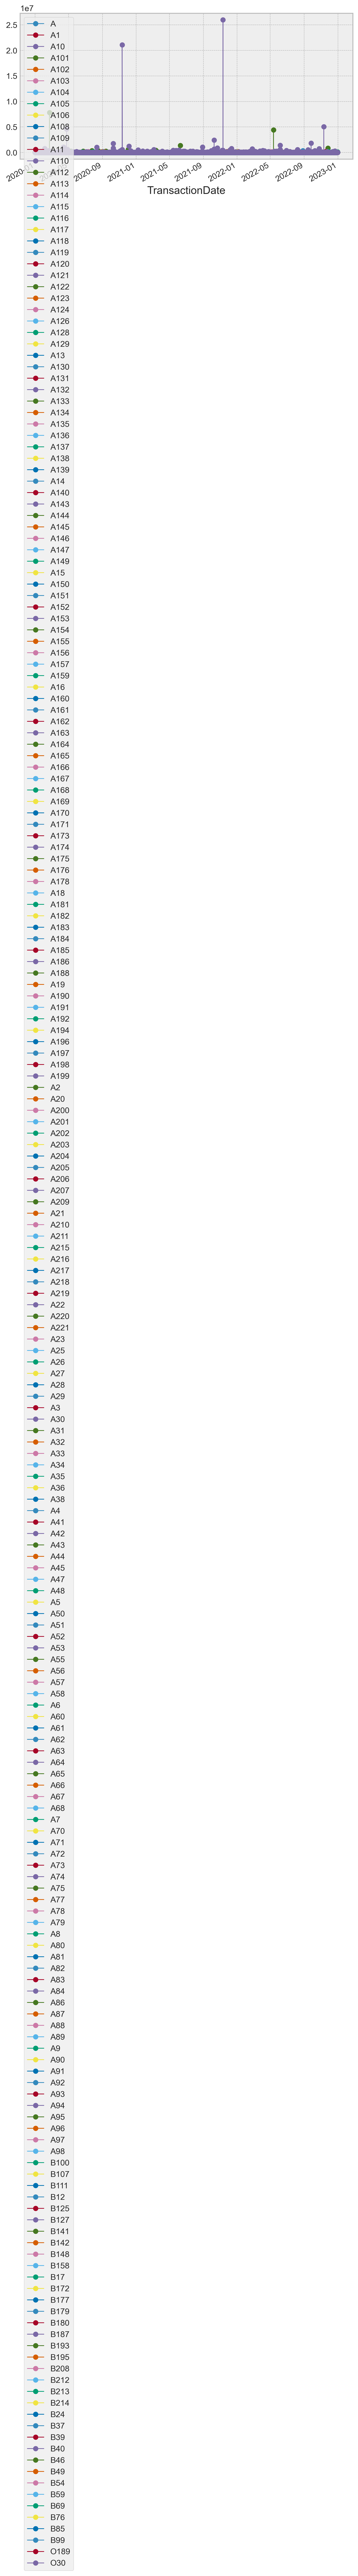

In [110]:
trans_data_promo_store_product_regions1 = trans_data_promo_store_product[["Region_Lvl1", "Region_Lvl2","TransactionDate","Trans_Sale_Amount"]]
trans_data_promo_store_product_regions1 = trans_data_promo_store_product_regions1.sort_values(by=['TransactionDate'])
trans_data_promo_store_product_regions1 = trans_data_promo_store_product_regions1.set_index(['TransactionDate'])
# trans_data_promo_store_product_subcats = trans_data_promo_store_product_subcats.set_index('TransactionDate')
# trans_data_promo_store_product_subcats.sort_index(axis = 1)
# trans_data_promo_store_product_regions1
trans_data_promo_store_product_regions1.groupby('Region_Lvl2')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
plt.show()


# trans_data_promo_store_product_regions = trans_data_promo_store_product[["Region_Lvl1", "Region_Lvl2","TransactionDate","Trans_Sale_Amount"]]
# plt.title('Revenue per Region')
# plt.ylabel('Revenue')
# sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', hue = "Region_Lvl2", data = trans_data_promo_store_product_regions, style = "Region_Lvl1")
# plt.show()
# trans_data_promo_store_product["TransactionDate"] = pd.to_datetime(trans_data_promo_store_product["TransactionDate"])
# trans_data_promo_store_product.info()

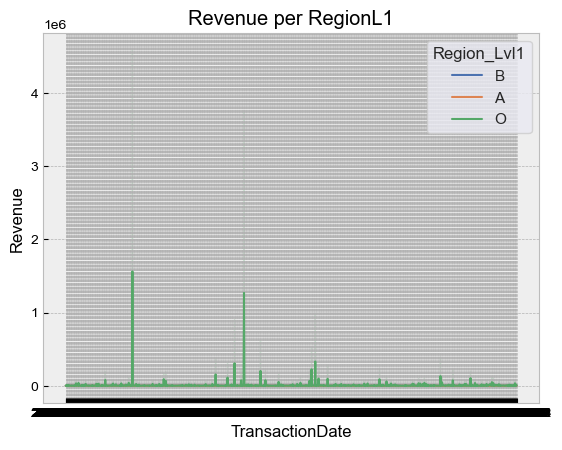

In [21]:
plt.style.use('bmh')
plt.title('Revenue per RegionL1')
plt.ylabel('Revenue')
sns.set(rc = {'figure.figsize':(8, 4)})
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', hue = "Region_Lvl1", data = trans_data_promo_store_product_regions)
plt.show()

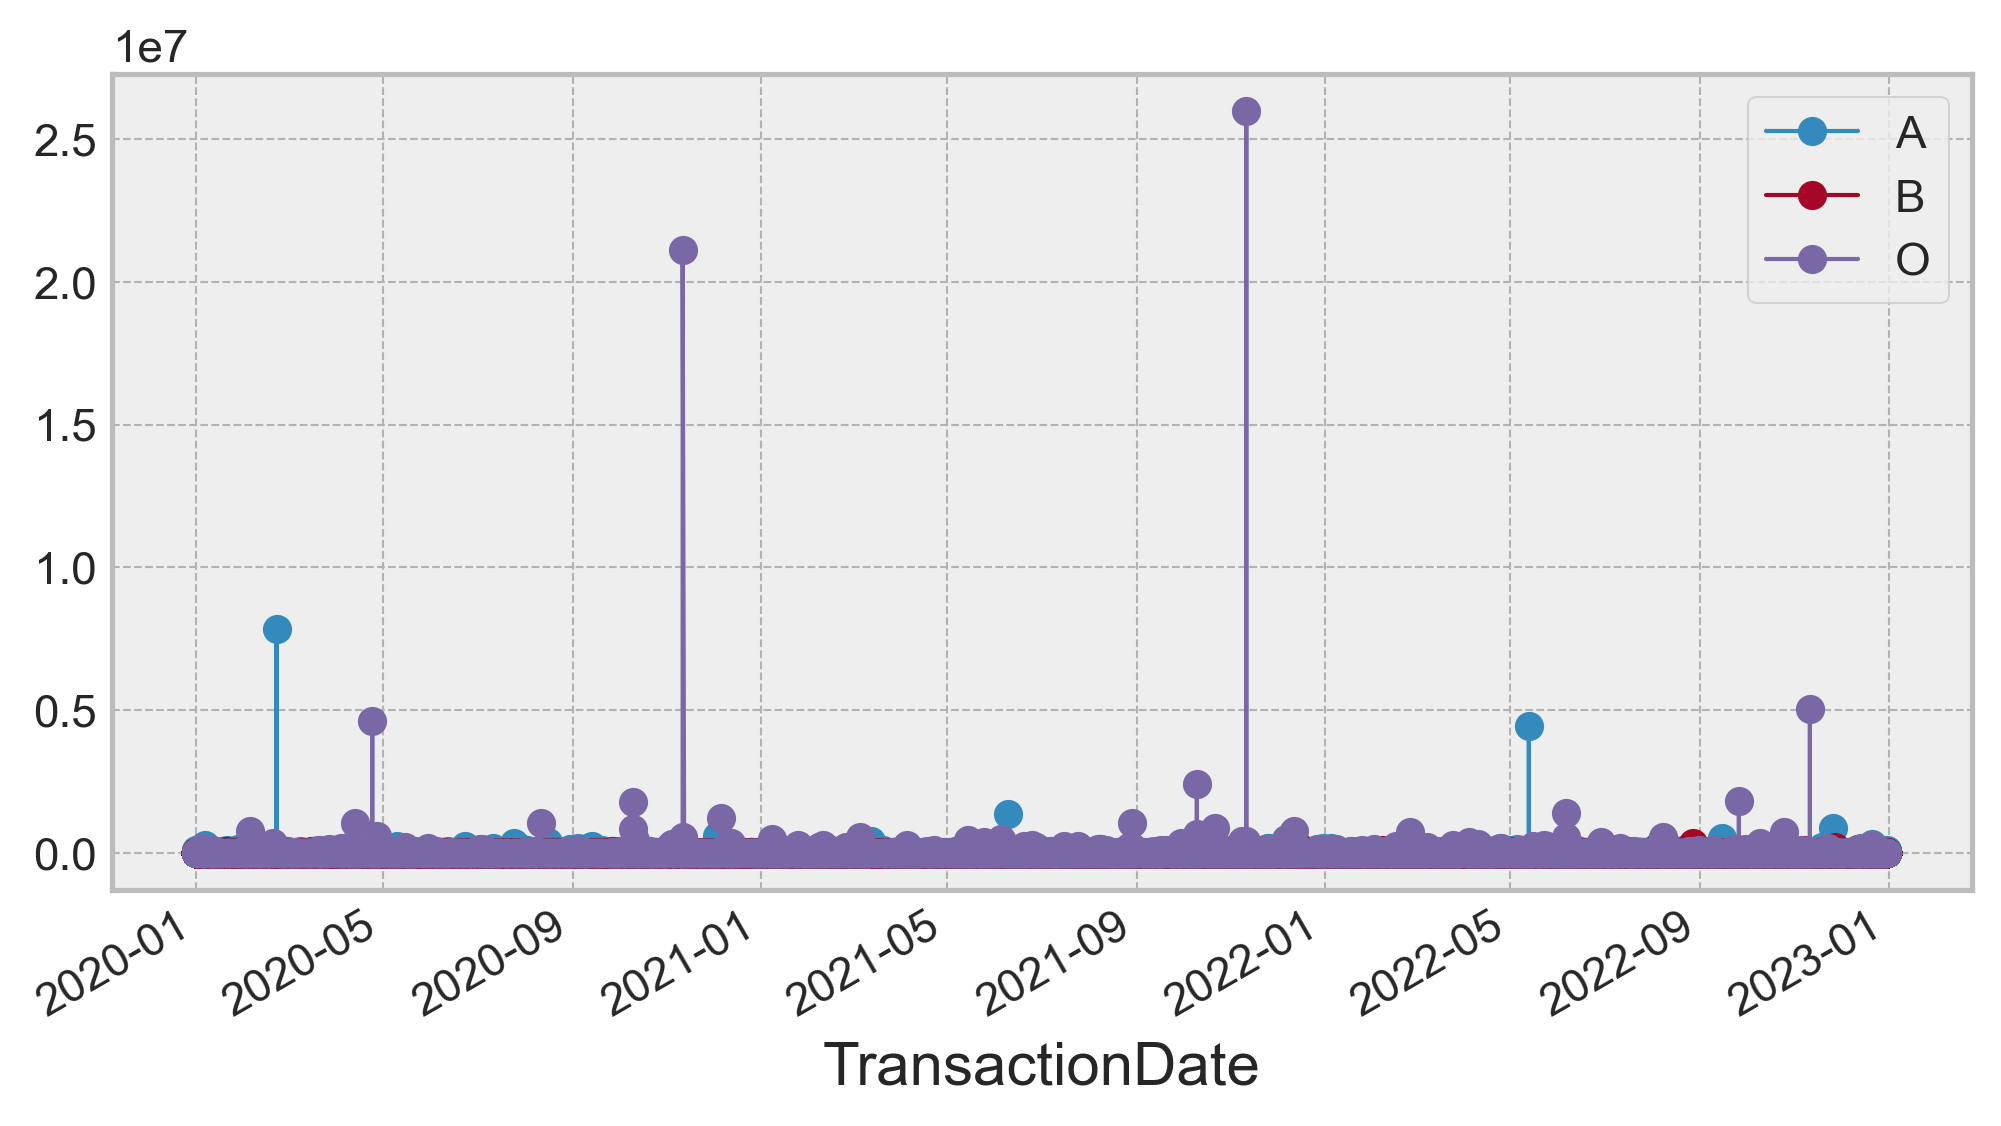

In [111]:
# trans_data_promo_store_product_regions1 = trans_data_promo_store_product[["Region_Lvl1", "Region_Lvl2","TransactionDate","Trans_Sale_Amount"]]
# trans_data_promo_store_product_regions1 = trans_data_promo_store_product_regions1.sort_values(by=['TransactionDate'])
# trans_data_promo_store_product_regions1 = trans_data_promo_store_product_regions1.set_index(['TransactionDate'])
# trans_data_promo_store_product_subcats = trans_data_promo_store_product_subcats.set_index('TransactionDate')
# trans_data_promo_store_product_subcats.sort_index(axis = 1)
# trans_data_promo_store_product_regions1
trans_data_promo_store_product_regions1.groupby('Region_Lvl1')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
plt.show()


# plt.style.use('bmh')
# plt.title('Revenue per RegionL1')
# plt.ylabel('Revenue')
# sns.set(rc = {'figure.figsize':(8, 4)})
# sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', hue = "Region_Lvl1", data = trans_data_promo_store_product_regions)
# plt.show()

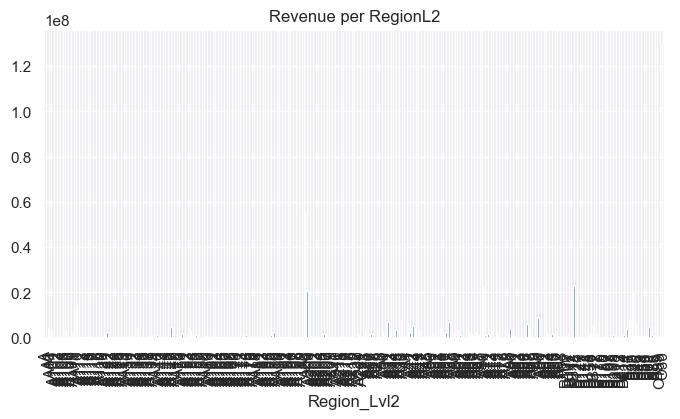

In [22]:
trans_data_promo_store_product_regions_rev = trans_data_promo_store_product_regions.groupby("Region_Lvl2")["Trans_Sale_Amount"].sum()
trans_data_promo_store_product_regions_rev.plot(
    kind='bar', 
    x='Region_Lvl2',
    y='Trans_Sale_Amount', 
    title='Revenue per RegionL2')
plt.show()

/Users/andrewchoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'B17'),
 Text(1, 0, 'A26'),
 Text(2, 0, 'B24'),
 Text(3, 0, 'A31'),
 Text(4, 0, 'A203'),
 Text(5, 0, 'A145'),
 Text(6, 0, 'B12'),
 Text(7, 0, 'A36'),
 Text(8, 0, 'A146'),
 Text(9, 0, 'A120'),
 Text(10, 0, 'A13'),
 Text(11, 0, 'A11'),
 Text(12, 0, 'A2'),
 Text(13, 0, 'A23'),
 Text(14, 0, 'A136'),
 Text(15, 0, 'A9'),
 Text(16, 0, 'A74'),
 Text(17, 0, 'A103'),
 Text(18, 0, 'A217'),
 Text(19, 0, 'A42'),
 Text(20, 0, 'A20'),
 Text(21, 0, 'A147'),
 Text(22, 0, 'A1'),
 Text(23, 0, 'B37'),
 Text(24, 0, 'A67'),
 Text(25, 0, 'A7'),
 Text(26, 0, 'B39'),
 Text(27, 0, 'A119'),
 Text(28, 0, 'A50'),
 Text(29, 0, 'A198'),
 Text(30, 0, 'A61'),
 Text(31, 0, 'B158'),
 Text(32, 0, 'A3'),
 Text(33, 0, 'A60'),
 Text(34, 0, 'A105'),
 Text(35, 0, 'A94'),
 Text(36, 0, 'A57'),
 Text(37, 0, 'A64'),
 Text(38, 0, 'A153'),
 Text(39, 0, 'A34'),
 Text(40, 0, 'A130'),
 Text(41, 0, 'A176'),
 Text(42, 0, 'B99'),
 Text(43, 0, 'A56'),
 Text(44, 0, 'A4'),
 Text(45, 0, 'B127'),
 Text(46, 0, 'A162'),
 Text(47, 0,

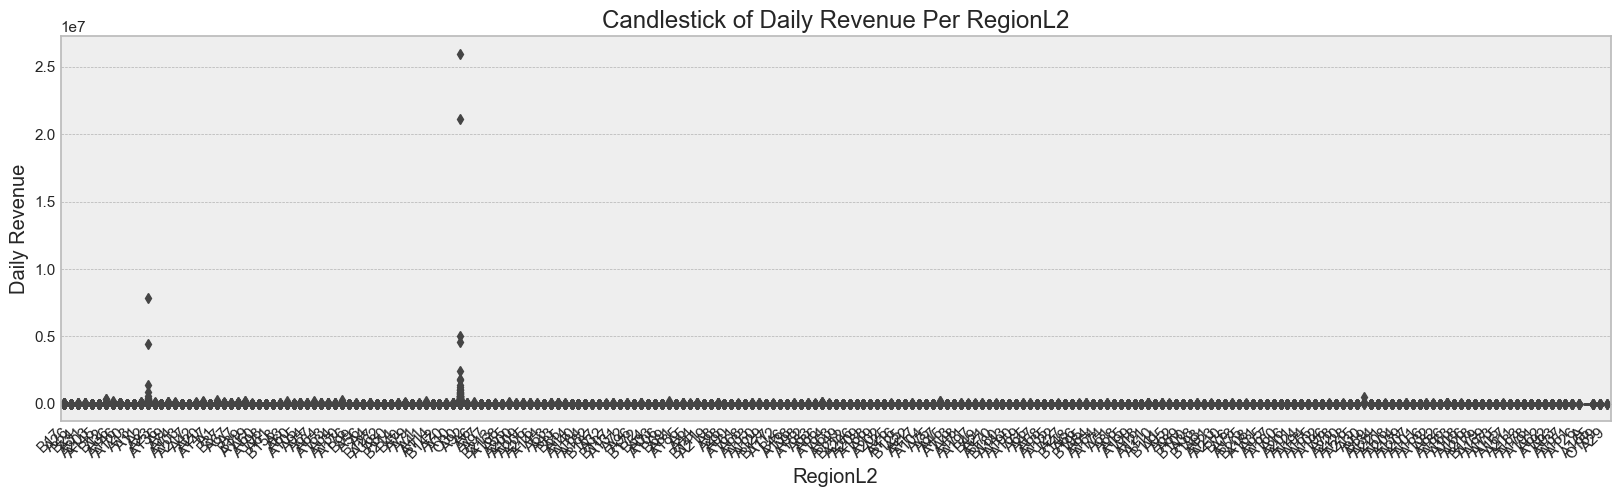

In [23]:
plt.style.use('bmh')
plt.figure(figsize=(20,5))
graph_1 = sns.boxplot(trans_data_promo_store_product_regions.Region_Lvl2, trans_data_promo_store_product_regions.Trans_Sale_Amount)
graph_1.set(title = "Candlestick of Daily Revenue Per RegionL2",
            xlabel = "RegionL2",
            ylabel = "Daily Revenue")

graph_1.set_xticklabels(graph_1.get_xticklabels(),
                        rotation = 45,
                        horizontalalignment = "right")

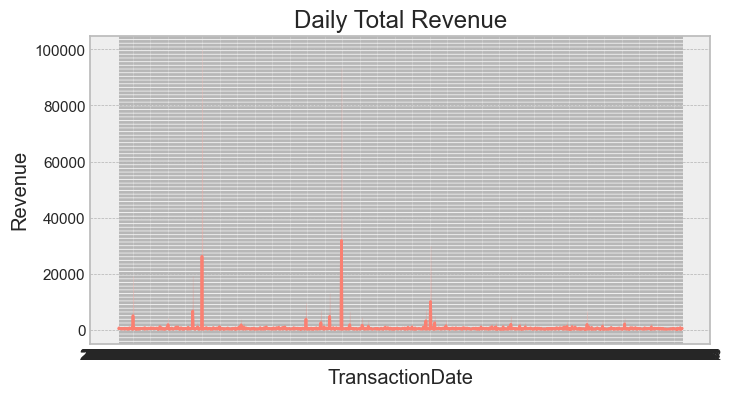

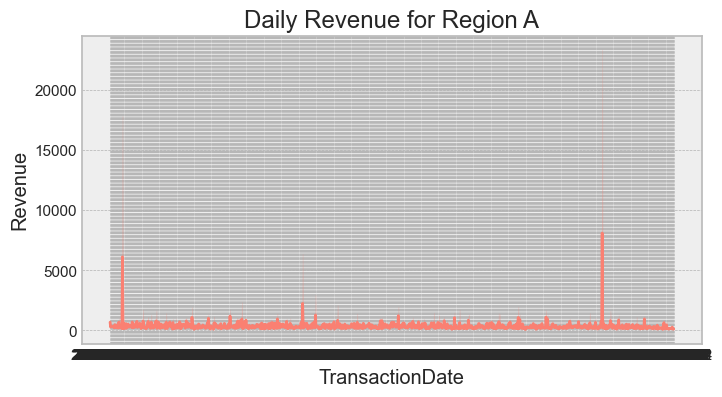

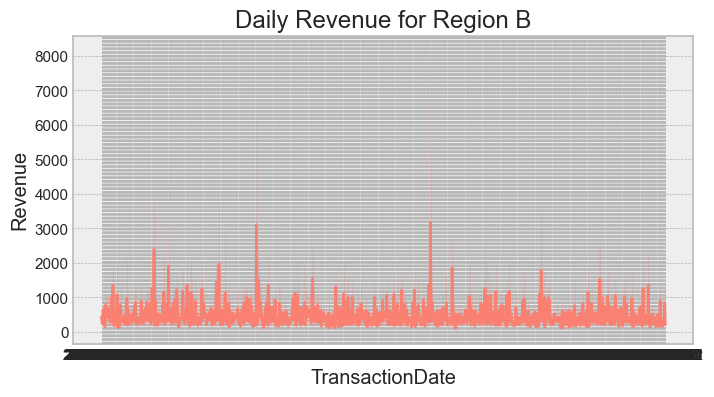

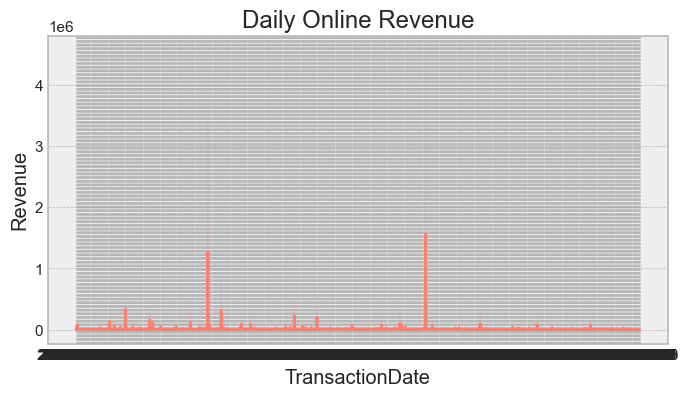

In [24]:
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats[['ProductCategory_Lvl2',"TransactionDate","Trans_Sale_Amount"]]
# cond_AA = trans_data_promo_store_product_subcats_AA['ProductCategory_Lvl2'] == 'AA'    
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats_AA[cond_AA]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Total Revenue')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_regions)
plt.show()


trans_data_promo_store_product_regionsAL1 = trans_data_promo_store_product_regions[['Region_Lvl1',"TransactionDate","Trans_Sale_Amount"]]
cond_rAL1 = trans_data_promo_store_product_regionsAL1['Region_Lvl1'] == 'A'    
trans_data_promo_store_product_regionsAL1 = trans_data_promo_store_product_regionsAL1[cond_rAL1]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Revenue for Region A')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_regionsAL1)
plt.show()


trans_data_promo_store_product_regionsBL1 = trans_data_promo_store_product_regions[['Region_Lvl1',"TransactionDate","Trans_Sale_Amount"]]
cond_rBL1 = trans_data_promo_store_product_regionsBL1['Region_Lvl1'] == 'B'    
trans_data_promo_store_product_regionsBL1 = trans_data_promo_store_product_regionsBL1[cond_rBL1]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Revenue for Region B')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_regionsBL1)
plt.show()


trans_data_promo_store_product_regionsOL1 = trans_data_promo_store_product_regions[['Region_Lvl1',"TransactionDate","Trans_Sale_Amount"]]
cond_rOL1 = trans_data_promo_store_product_regionsOL1['Region_Lvl1'] == 'O'    
trans_data_promo_store_product_regionsOL1 = trans_data_promo_store_product_regionsOL1[cond_rOL1]
# trans_data_promo_store_product_subcats_AA = trans_data_promo_store_product_subcats.groupby("TransactionDate")["Trans_Sale_Amount"].sum()
# trans_data_promo_store_product_subcats_AA
plt.title('Daily Online Revenue')
plt.ylabel('Revenue')
sns.lineplot(x = "TransactionDate", y = "Trans_Sale_Amount", color = 'salmon', data = trans_data_promo_store_product_regionsOL1)
plt.show()

In [25]:
CPI = pd.read_excel('Consumer Price Index_vShared.xlsx')
CPI

Date_monthly  CPI_monthly  Date_daily   CPI_daily
0      2019-01-01         120.5 2019-01-01  120.500000
1      2019-02-01         120.8 2019-01-02  120.509677
2      2019-03-01         121.1 2019-01-03  120.519355
3      2019-04-01         121.1 2019-01-04  120.529032
4      2019-05-01         121.4 2019-01-05  120.538710
...           ...           ...        ...         ...
1456          NaT           NaN 2022-12-27  129.619355
1457          NaT           NaN 2022-12-28  129.635484
1458          NaT           NaN 2022-12-29  129.651613
1459          NaT           NaN 2022-12-30  129.667742
1460          NaT           NaN 2022-12-31  129.683871

[1461 rows x 4 columns]

In [113]:
trans_data_promo_store_product["TransactionDate"] = pd.to_datetime(trans_data_promo_store_product["TransactionDate"])
trans_data_promo_store_product_CPI = trans_data_promo_store_product.merge(CPI, left_on=['TransactionDate'], right_on=['Date_daily'], how='left')
trans_data_promo_store_product_CPI

Unnamed: 0 TransactionDate  DayOfWeek  WeekendFlag  StoreKey  \
0                 0      2020-01-29  Wednesday        False       118   
1                 1      2021-10-31     Sunday         True        78   
2                 2      2021-06-17   Thursday        False       672   
3                 3      2022-06-02     Sunday         True       193   
4                 4      2022-03-29    Tuesday        False      2059   
...             ...             ...        ...          ...       ...   
1064567     1064567      2020-11-24    Tuesday        False        56   
1064568     1064568      2021-12-30   Thursday        False       894   
1064569     1064569      2022-10-28     Friday        False       597   
1064570     1064570      2021-01-23   Saturday         True       285   
1064571     1064571      2020-11-26   Thursday        False       378   

         ProductKey  UnitVolume  ActualSales  SalesDiscount  RetailFullPrice  \
0             49334           2    103.35080            -16         120.2244   
1             59511           1     17.13725            -17          34.2745   
2             97438           1     22.46298            -14          37.4383   
3             58921           2     42.18400             -9          51.6754   
4             44633           1     31.63800            -12          44.2932   
...             ...         ...          ...            ...              ...   
1064567       49328           1     32.69260              0          32.6926   
1064568       49325           1     27.99963             -3          31.1107   
1064569       49326           7    239.92150              0         239.9215   
1064570       49328           2     65.38520              0          65.3852   
1064571       44784           1     26.57592             -6          33.2199   

         ...  Region_Lvl2  TotDisc BrandKey SupplierKey ProductCategory_Lvl1  \
0        ...          B17       32     3521  1028407101           Category A   
1        ...          A26       17     3521  1039040101           Category A   
2        ...          B24       14     3521  1039040101           Category A   
3        ...          A31       18     3521  1039040101           Category A   
4        ...         A203       12     3521  1039040101           Category A   
...      ...          ...      ...      ...         ...                  ...   
1064567  ...          A57        0     3521  1028407101           Category A   
1064568  ...          O30        3     3521  1039040118           Category A   
1064569  ...           A2        0     3521  1039040125           Category A   
1064570  ...          B37        0     3521  1028407101           Category A   
1064571  ...         A175        6     3521  1039040125           Category A   

        ProductCategory_Lvl2 Date_monthly CPI_monthly  Date_daily   CPI_daily  
0                         AC          NaT          NaN 2020-01-29  122.400000  
1                         AB          NaT          NaN 2021-10-31  123.990323  
2                         AC          NaT          NaN 2021-06-17  122.826667  
3                         AA          NaT          NaN 2022-06-02  127.416667  
4                         AA          NaT          NaN 2022-03-29  125.875342  
...                      ...          ...          ...        ...         ...  
1064567                   AC          NaT          NaN 2020-11-24  120.460000  
1064568                   AC          NaT          NaN 2021-12-30  124.874194  
1064569                   AC          NaT          NaN 2022-10-28  128.948387  
1064570                   AC          NaT          NaN 2021-01-23  122.383871  
1064571                   AC          NaT          NaN 2020-11-26  120.500000  

[1064572 rows x 28 columns]

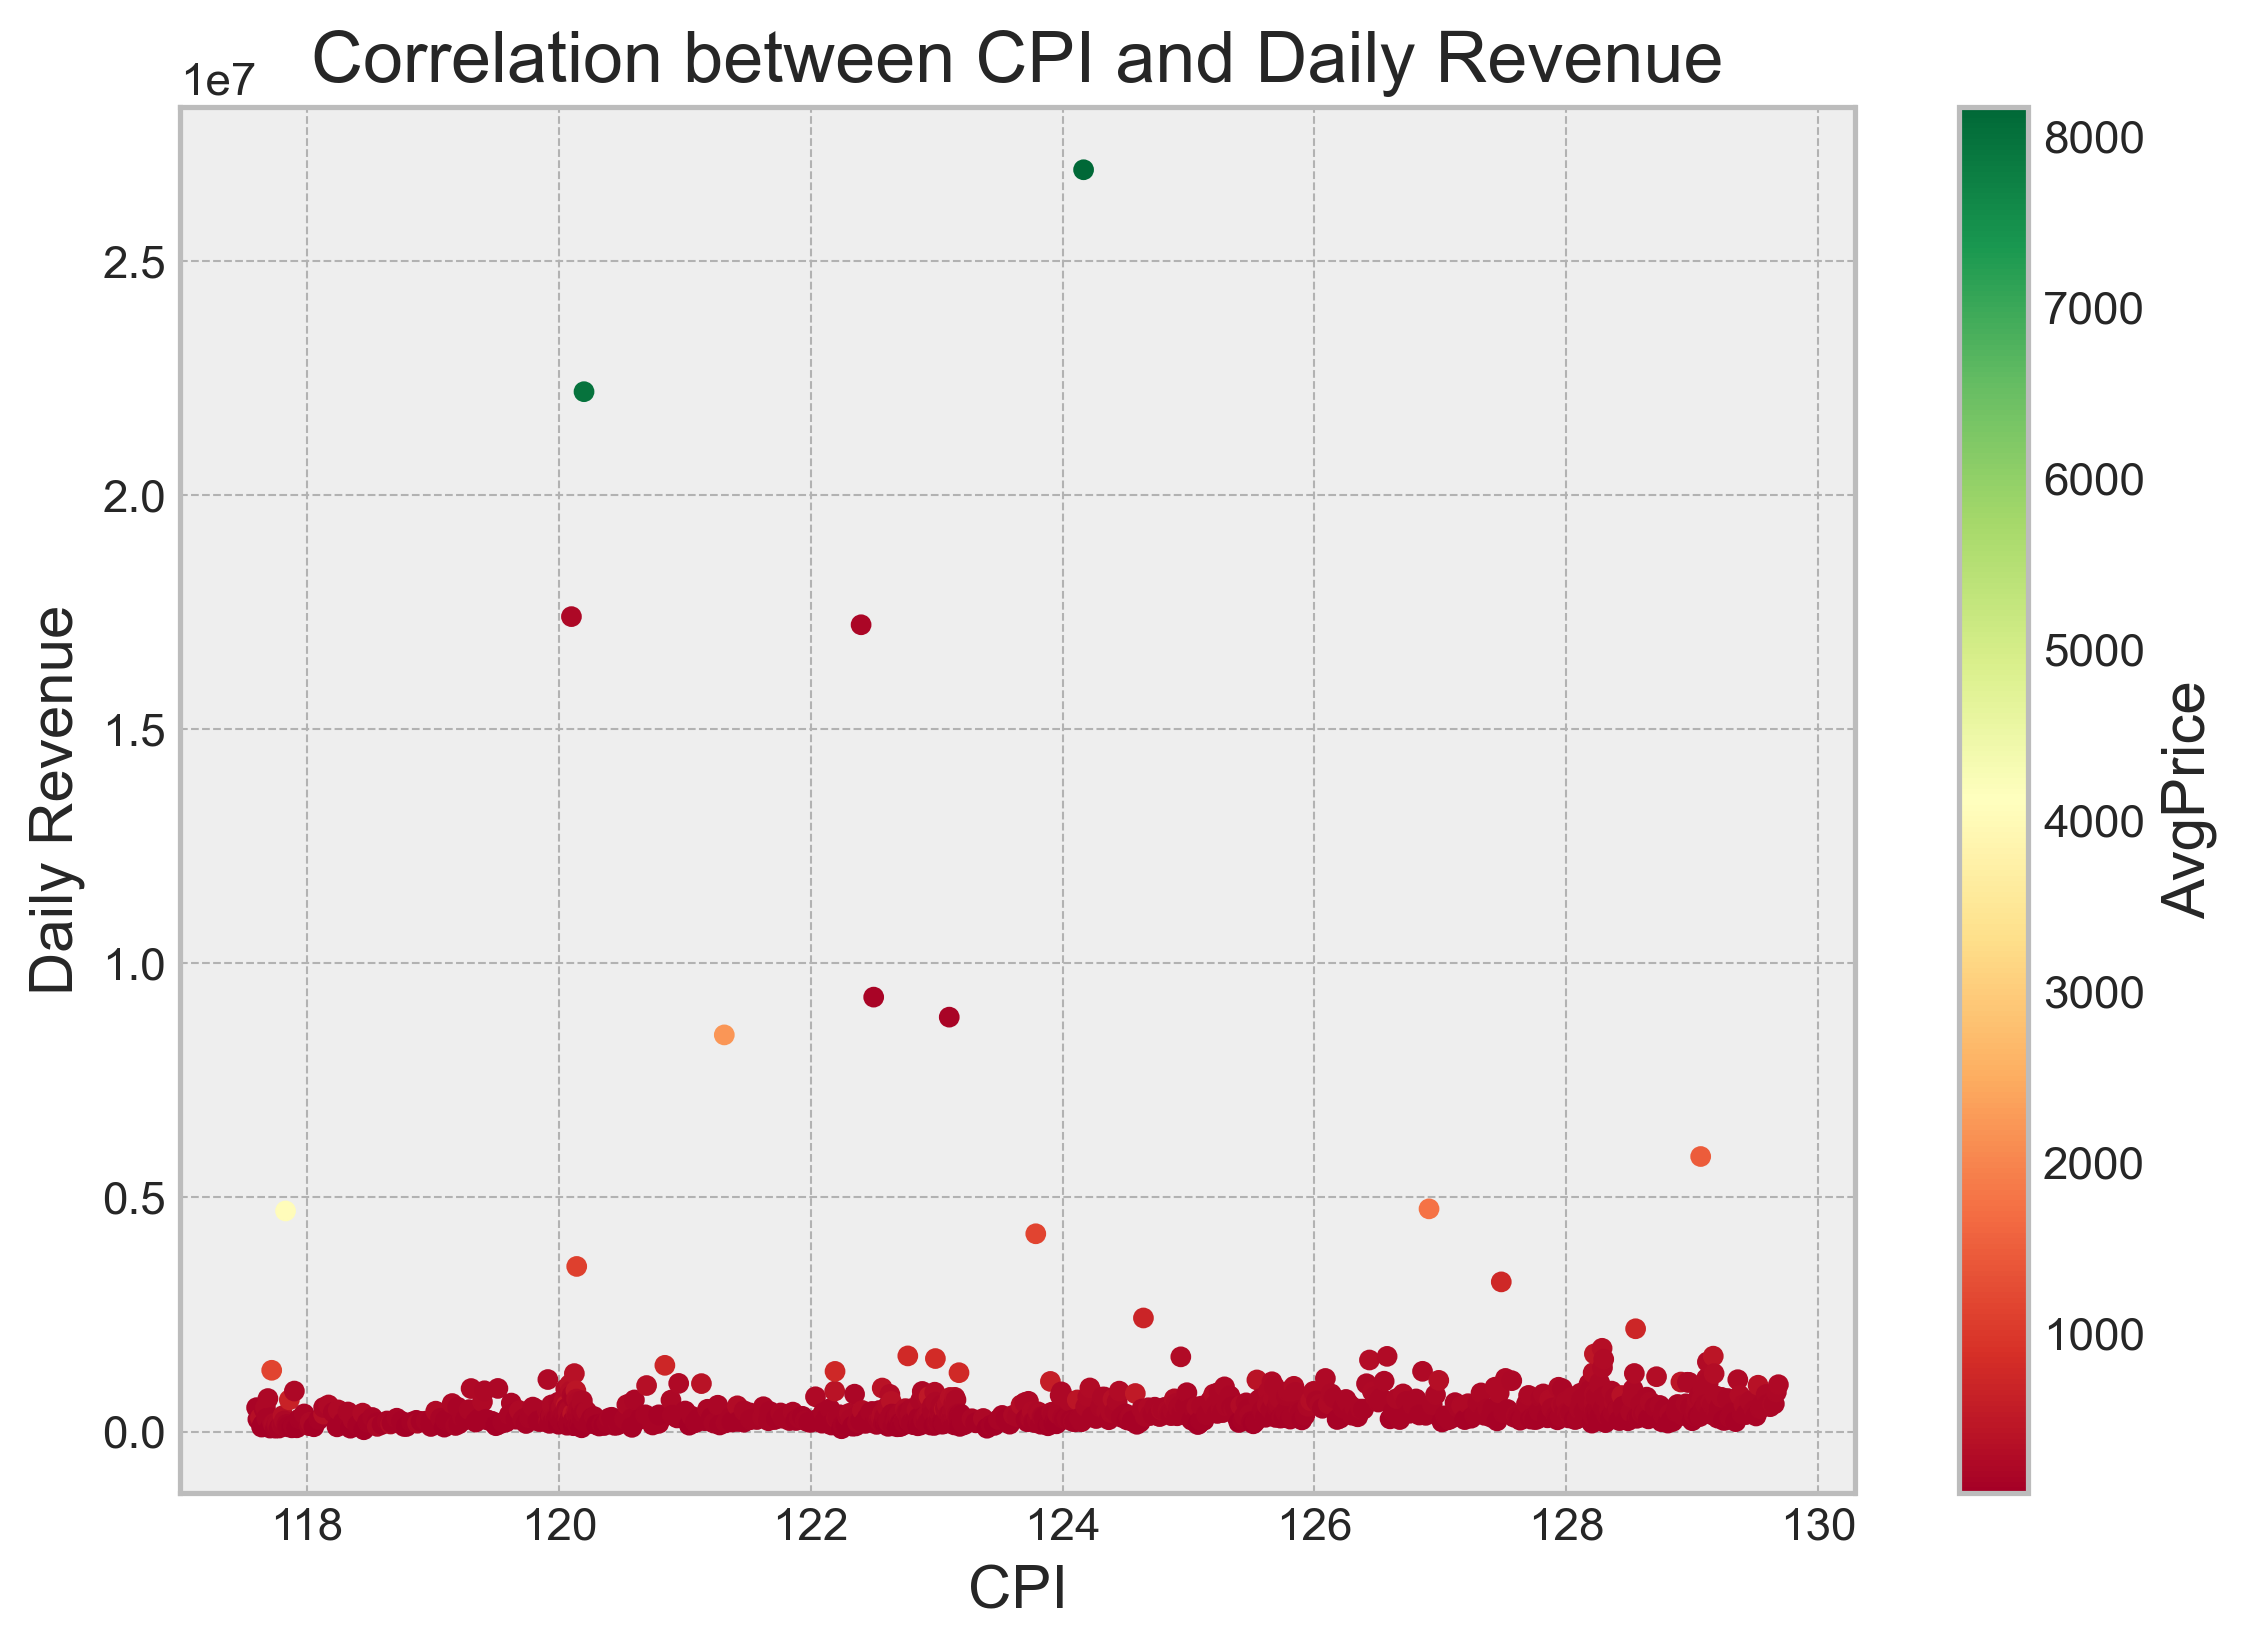

In [114]:
# # x = []
# # y = []
# # z = []

# # for row in trans_data_promo_store_product_CPI:
# #     x.append(row['CPI_daily'])
# #     y.append(row['trans_sale_amount'].sum())
# #     z.append(row(['trans_sale_amount'].sum()) / row['UnitVolume'].sum())

    
# # trans_data_promo_store_product_subcats_SCrev = trans_data_promo_store_product_subcats.groupby("ProductCategory_Lvl2")["Trans_Sale_Amount"].sum()
# # trans_data_promo_store_product_subcats_SCrev.plot(
# #     kind='bar', 
# #     x='ProductCategory_Lvl2', 
# #     y='Trans_Sale_Amount', 
# #     color='orange', 
# #     title='Revenue per Sub Category',
# # #     ylim=(10,18) 
# # )
# # plt.show()
    


# plt.figure(figsize =(16, 8))
# plt.title('Correlation between CPI and Daily Revenue')
# plt.ylabel('Daily Revenue')
# plt.xlabel('CPI')

# plt.scatter(trans_data_promo_store_product_CPI['CPI_daily'], trans_data_promo_store_product_CPI['trans_sale_amount'], c = (trans_data_promo_store_product_CPI['trans_sale_amount'])/(trans_data_promo_store_product_CPI['UnitVolume']), cmap = 'magma', alpha = 0.3)
# plt.colorbar(label = 'price_per_sqm')
# plt.show()
# trans_data_promo_store_product_CPIsum =trans_data_promo_store_product_CPI.groupby(['CPI_daily']).sum()


trans_data_promo_store_product_CPIsum =trans_data_promo_store_product_CPI.groupby(['CPI_daily'], as_index = False).sum()
trans_data_promo_store_product_CPIsum["AvgPrice"] = trans_data_promo_store_product_CPIsum["Trans_Sale_Amount"]/trans_data_promo_store_product_CPIsum["UnitVolume"]
# trans_data_promo_store_product_CPIsum['CPI_daily'] = 'CPI_daily'
# trans_data_promo_store_product_CPIsum

trans_data_promo_store_product_CPIsum.plot(kind="scatter", 
        x="CPI_daily", 
        y="Trans_Sale_Amount", 
        c="AvgPrice",
        figsize = (9,6),
        title = 'Correlation between CPI and Daily Revenue',
        colormap="RdYlGn")
plt.xlabel('CPI')
plt.ylabel('Daily Revenue')
plt.show()
                                        
# pd.trans_data_promo_store_product_CPI.plot.scatter(x=trans_data_promo_store_product_CPI['CPI_daily'],
#                              y=trans_data_promo_store_product_CPI['trans_sale_amount'],
#                              s=df['your_size_values'],
#                              c=df['your_color_values'])                                        

In [115]:
# # x = []
# # y = []
# # z = []

# # for row in trans_data_promo_store_product_CPI:
# #     x.append(row['CPI_daily'])
# #     y.append(row['trans_sale_amount'].sum())
# #     z.append(row(['trans_sale_amount'].sum()) / row['UnitVolume'].sum())

    
# # trans_data_promo_store_product_subcats_SCrev = trans_data_promo_store_product_subcats.groupby("ProductCategory_Lvl2")["Trans_Sale_Amount"].sum()
# # trans_data_promo_store_product_subcats_SCrev.plot(
# #     kind='bar', 
# #     x='ProductCategory_Lvl2', 
# #     y='Trans_Sale_Amount', 
# #     color='orange', 
# #     title='Revenue per Sub Category',
# # #     ylim=(10,18) 
# # )
# # plt.show()
    


# plt.figure(figsize =(16, 8))
# plt.title('Correlation between CPI and Daily Revenue')
# plt.ylabel('Daily Revenue')
# plt.xlabel('CPI')

# plt.scatter(trans_data_promo_store_product_CPI['CPI_daily'], trans_data_promo_store_product_CPI['trans_sale_amount'], c = (trans_data_promo_store_product_CPI['trans_sale_amount'])/(trans_data_promo_store_product_CPI['UnitVolume']), cmap = 'magma', alpha = 0.3)
# plt.colorbar(label = 'price_per_sqm')
# plt.show()
# trans_data_promo_store_product_CPIsum =trans_data_promo_store_product_CPI.groupby(['CPI_daily']).sum()

# trans_data_promo_store_product_CPI_hols = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['TransactionDate'] == (["12-31"],["2020-01-25"], ["2021-02-12"], ["02-01"],["2020-05-23"],["2021-05-12"],["05-01"],["2020-05-07"],["2021-05-26"],["2022-05-16"],["06-06"],["2020-07-30"],["2021-07-19"],["2022-07-08"],['12-25'])]
                                                                                                                                        
# def get_hols(trans_data_promo_store_product_CPI):
#     if (trans_data_promo_store_product_CPI['TransactionDate'].isin(["12-31"],["2020-01-25"], ["2021-02-12"], ["02-01"],["2020-05-23"],["2021-05-12"],["05-01"],["2020-05-07"],["2021-05-26"],["2022-05-16"],["06-06"],["2020-07-30"],["2021-07-19"],["2022-07-08"],['12-25'])
#         trans_data_promo_store_product_CPI_hols = 
#     elif (df['EmployeeLowerBound'] >= min_EmployeeLowerBound):
#         return 1
#     elif (df['LegalFormID'].isin(list_LegalFormIDs)):
#         return 1
#     else:
#         return 0                                                                                                                                        


# trans_data_promo_store_product_CPIsum =trans_data_promo_store_product_CPI.groupby(['CPI_daily'], as_index = False).sum()
# trans_data_promo_store_product_CPIsum["AvgPrice"] = trans_data_promo_store_product_CPIsum["Trans_Sale_Amount"]/trans_data_promo_store_product_CPIsum["UnitVolume"]
# # trans_data_promo_store_product_CPIsum['CPI_daily'] = 'CPI_daily'
# # trans_data_promo_store_product_CPIsum
# # cond_WE = trans_data_promo_store_product_CPIsum['WeekendFlag'] = True
# trans_data_promo_store_product_CPIsum_WE = trans_data_promo_store_product_CPIsum.groupby(['WeekendFlag'])
# trans_data_promo_store_product_CPIsum_WE.getgroup("True")
# trans_data_promo_store_product_CPIsum_WD =  

# trans_data_promo_store_product_CPIsum_WE.plot(kind="scatter", 
#         x="CPI_daily", 
#         y="Trans_Sale_Amount", 
#         c="AvgPrice",
#         figsize = (9,6),
#         title = 'Correlation between CPI and Daily Revenue, Weekends',
#         colormap="RdYlGn")
# plt.xlabel('CPI')
# plt.ylabel('Daily Revenue')
# plt.show()
         
    
# trans_data_promo_store_product_CPIsum_WD.plot(kind="scatter", 
#         x="CPI_daily", 
#         y="Trans_Sale_Amount", 
#         c="AvgPrice",
#         figsize = (9,6),
#         title = 'Correlation between CPI and Daily Revenue, Weekdays',
#         colormap="RdYlGn")
# plt.xlabel('CPI')
# plt.ylabel('Daily Revenue')
# plt.show()
    
# # # pd.trans_data_promo_store_product_CPI.plot.scatter(x=trans_data_promo_store_product_CPI['CPI_daily'],
# # #                              y=trans_data_promo_store_product_CPI['trans_sale_amount'],
# # #                              s=df['your_size_values'],
# # #                              c=df['your_color_values'])                                        

In [118]:
# trans_data_promo_store_product_CPI_49340 = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['ProductKey'] == 49340] 
# trans_data_promo_store_product_CPI_49340.rename(columns = {'trans_sale_amount':'trans_sale_amount49340'})

# trans_data_promo_store_product_CPI_49340                                         
fig, ax = plt.subplots()
trans_data_promo_store_product_CPI_49340.plot.line(ax = ax, x = 'TransactionDate',y = 'trans_sale_amount49340', color = 'r', linewidth = 2, linestyle ='dashed')
trans_data_promo_store_product_CPI.plot.line(ax = ax, x ='TransactionDate', y = 'trans_sale_amount', color = 'b', linewidth= 4, linestyle = 'solid')
plt.show()


# # trans_data_promo_store_product_CPI_49340.plot.line(y='trans_sale_amount', x='TransactionDate')

Unnamed: 0 TransactionDate  DayOfWeek  WeekendFlag  StoreKey  \
40               40      2020-10-06  Wednesday        False       292   
49               49      2022-05-03   Saturday         True        95   
109             109      2020-04-10     Sunday         True       606   
135             135      2020-09-17   Thursday        False       428   
138             138      2022-05-28   Saturday         True       178   
...             ...             ...        ...          ...       ...   
1064369     1064369      2022-01-22   Saturday         True       360   
1064416     1064416      2021-04-05    Tuesday        False        89   
1064440     1064440      2022-07-18     Monday        False      2019   
1064450     1064450      2022-11-13     Sunday         True       330   
1064552     1064552      2020-08-23     Sunday         True       101   

         ProductKey  UnitVolume  ActualSales  SalesDiscount  RetailFullPrice  \
40            49340           1     10.54600              0          10.5460   
49            49340           2     22.14660              0          22.1466   
109           49340           1     10.01870              0          10.0187   
135           49340           2     20.03740              0          20.0374   
138           49340           4     44.29320              0          44.2932   
...             ...         ...          ...            ...              ...   
1064369       49340           1      9.96597             -1          11.0733   
1064416       49340           1     11.07330              0          11.0733   
1064440       49340           1     11.07330              0          11.0733   
1064450       49340           6     66.43980              0          66.4398   
1064552       49340           1     10.01870              0          10.0187   

         ...  Region_Lvl2  TotDisc BrandKey SupplierKey ProductCategory_Lvl1  \
40       ...         B158        0     3521  1036290101           Category A   
49       ...          A57        0     3521  1036290101           Category A   
109      ...          A23        0     3521  1036290101           Category A   
135      ...         A140        0     3521  1036290101           Category A   
138      ...           A2        0     3521  1036290101           Category A   
...      ...          ...      ...      ...         ...                  ...   
1064369  ...           A7        1     3521  1036290101           Category A   
1064416  ...          A11        0     3521  1036290101           Category A   
1064440  ...          A11        0     3521  1036290101           Category A   
1064450  ...         B172        0     3521  1036290101           Category A   
1064552  ...           A7        0     3521  1036290101           Category A   

        ProductCategory_Lvl2 Date_monthly CPI_monthly  Date_daily   CPI_daily  
40                        AA          NaT          NaN 2020-10-06  120.167742  
49                        AA          NaT          NaN 2022-05-03  126.651613  
109                       AA          NaT          NaN 2020-04-10  117.690000  
135                       AA          NaT          NaN 2020-09-17  120.153333  
138                       AA          NaT          NaN 2022-05-28  127.296774  
...                      ...          ...          ...        ...         ...  
1064369                   AA          NaT          NaN 2022-01-22  125.103226  
1064416                   AA          NaT          NaN 2021-04-05  123.100000  
1064440                   AA          NaT          NaN 2022-07-18  128.064516  
1064450                   AA          NaT          NaN 2022-11-13  129.080000  
1064552                   AA          NaT          NaN 2020-08-23  120.100000  

[23417 rows x 28 columns]

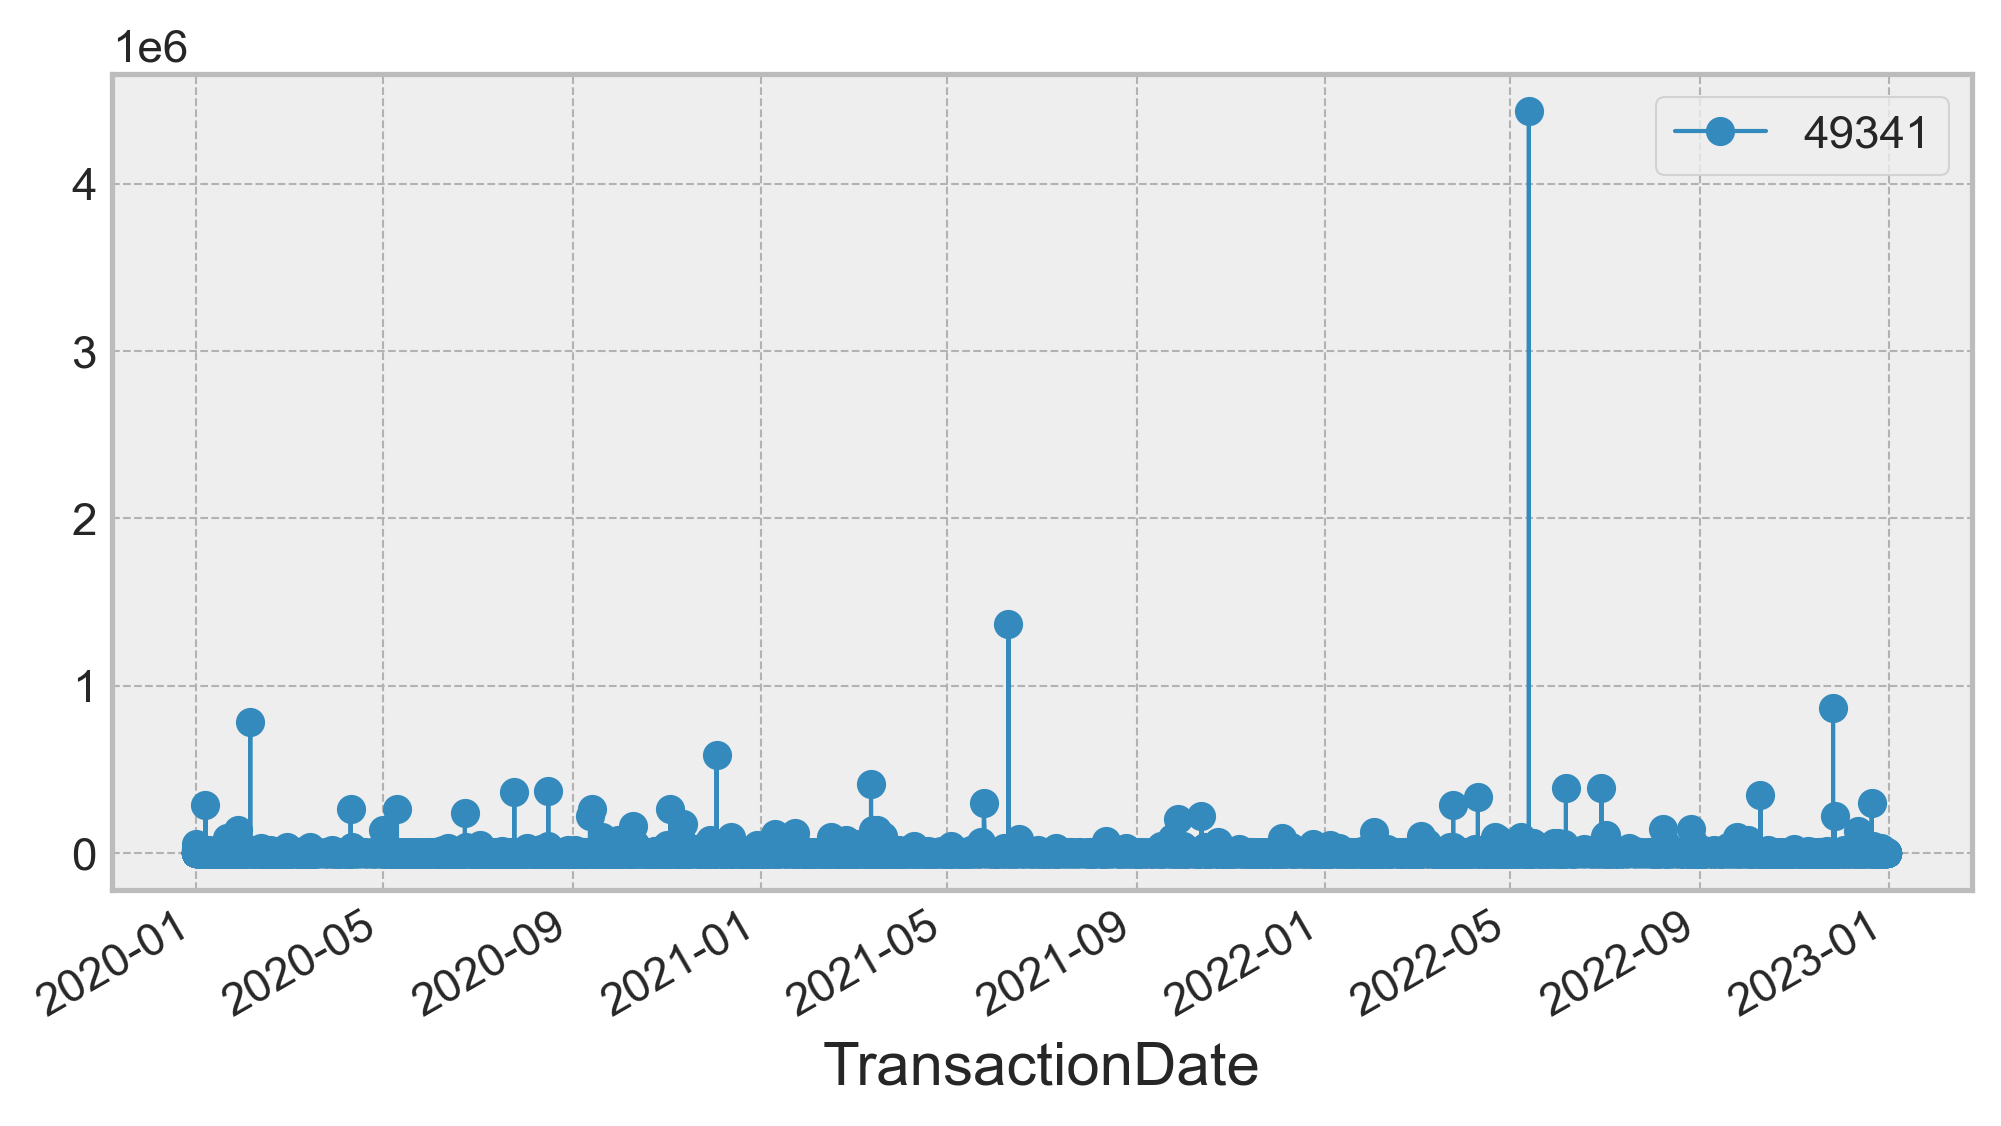

In [148]:
# trans_data_promo_store_product_CPI = trans_data_promo_store_product_CPI.sort_values(by=['TransactionDate'])
# trans_data_promo_store_product_CPI = trans_data_promo_store_product_CPI.set_index(['TransactionDate'])
# trans_data_promo_store_product_CPI
trans_data_promo_store_product_CPI_prodsel49341 = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['ProductKey'] == 49341] 
# trans_data_promo_store_product_CPI_49341.rename(columns = {'trans_sale_amount':'trans_sale_amount49340'})
trans_data_promo_store_product_CPI_prodsel49341.groupby('ProductKey')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
plt.show()


# trans_data_promo_store_product_CPI_prodsel49340 = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['ProductKey'] == 49340] 
# # trans_data_promo_store_product_CPI_49341.rename(columns = {'trans_sale_amount':'trans_sale_amount49340'})
# trans_data_promo_store_product_CPI_prodsel.groupby('ProductKey')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
# plt.show()



# trans_data_promo_store_product_CPI_prodsel49333 = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['ProductKey'] == 49333] 
# # trans_data_promo_store_product_CPI_49341.rename(columns = {'trans_sale_amount':'trans_sale_amount49340'})
# trans_data_promo_store_product_CPI_prodsel.groupby('ProductKey')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
# plt.show()


# trans_data_promo_store_product_CPI_prodsel49329 = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['ProductKey'] == 49329] 
# # trans_data_promo_store_product_CPI_49341.rename(columns = {'trans_sale_amount':'trans_sale_amount49340'})
# trans_data_promo_store_product_CPI_prodsel.groupby('ProductKey')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
# plt.show()

# fig, ax = plt.subplots()
# trans_data_promo_store_product_CPI_49340.plot.line(ax = ax, x = 'TransactionDate',y = 'trans_sale_amount49340', color = 'r', linewidth = 2, linestyle ='dashed')
# trans_data_promo_store_product_CPI.plot.line(ax = ax, x ='TransactionDate', y = 'trans_sale_amount', color = 'b', linewidth= 4, linestyle = 'solid')
# plt.show()



# trans_data_promo_store_product_regions1 = trans_data_promo_store_product[["Region_Lvl1", "Region_Lvl2","TransactionDate","Trans_Sale_Amount"]]
# trans_data_promo_store_product_regions1 = trans_data_promo_store_product_regions1.sort_values(by=['TransactionDate'])
# trans_data_promo_store_product_regions1 = trans_data_promo_store_product_regions1.set_index(['TransactionDate'])
# # trans_data_promo_store_product_subcats = trans_data_promo_store_product_subcats.set_index('TransactionDate')
# # trans_data_promo_store_product_subcats.sort_index(axis = 1)
# # trans_data_promo_store_product_regions1
# trans_data_promo_store_product_regions1.groupby('Region_Lvl2')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
# plt.show()


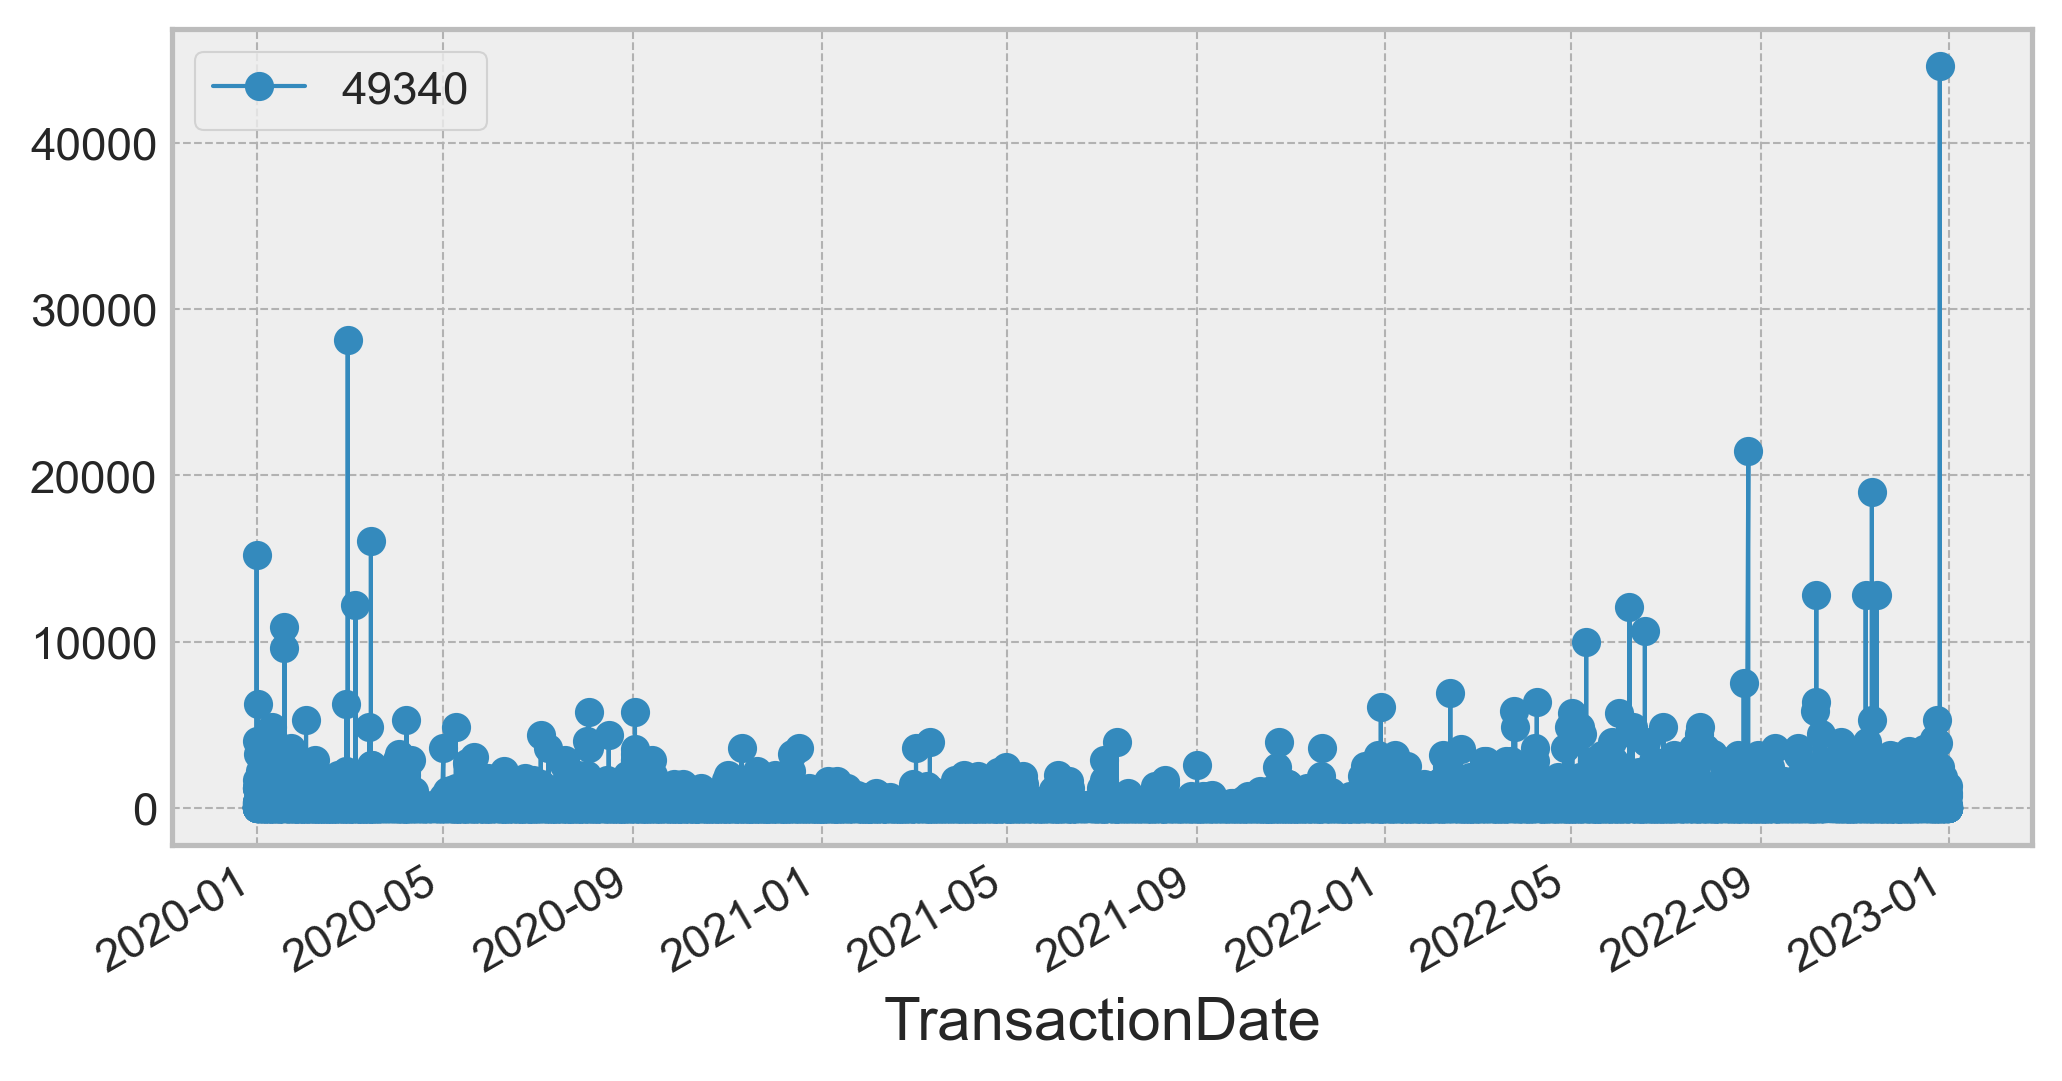

In [149]:
trans_data_promo_store_product_CPI_prodsel49340 = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['ProductKey'] == 49340] 
# trans_data_promo_store_product_CPI_49341.rename(columns = {'trans_sale_amount':'trans_sale_amount49340'})
trans_data_promo_store_product_CPI_prodsel49340.groupby('ProductKey')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
plt.show()

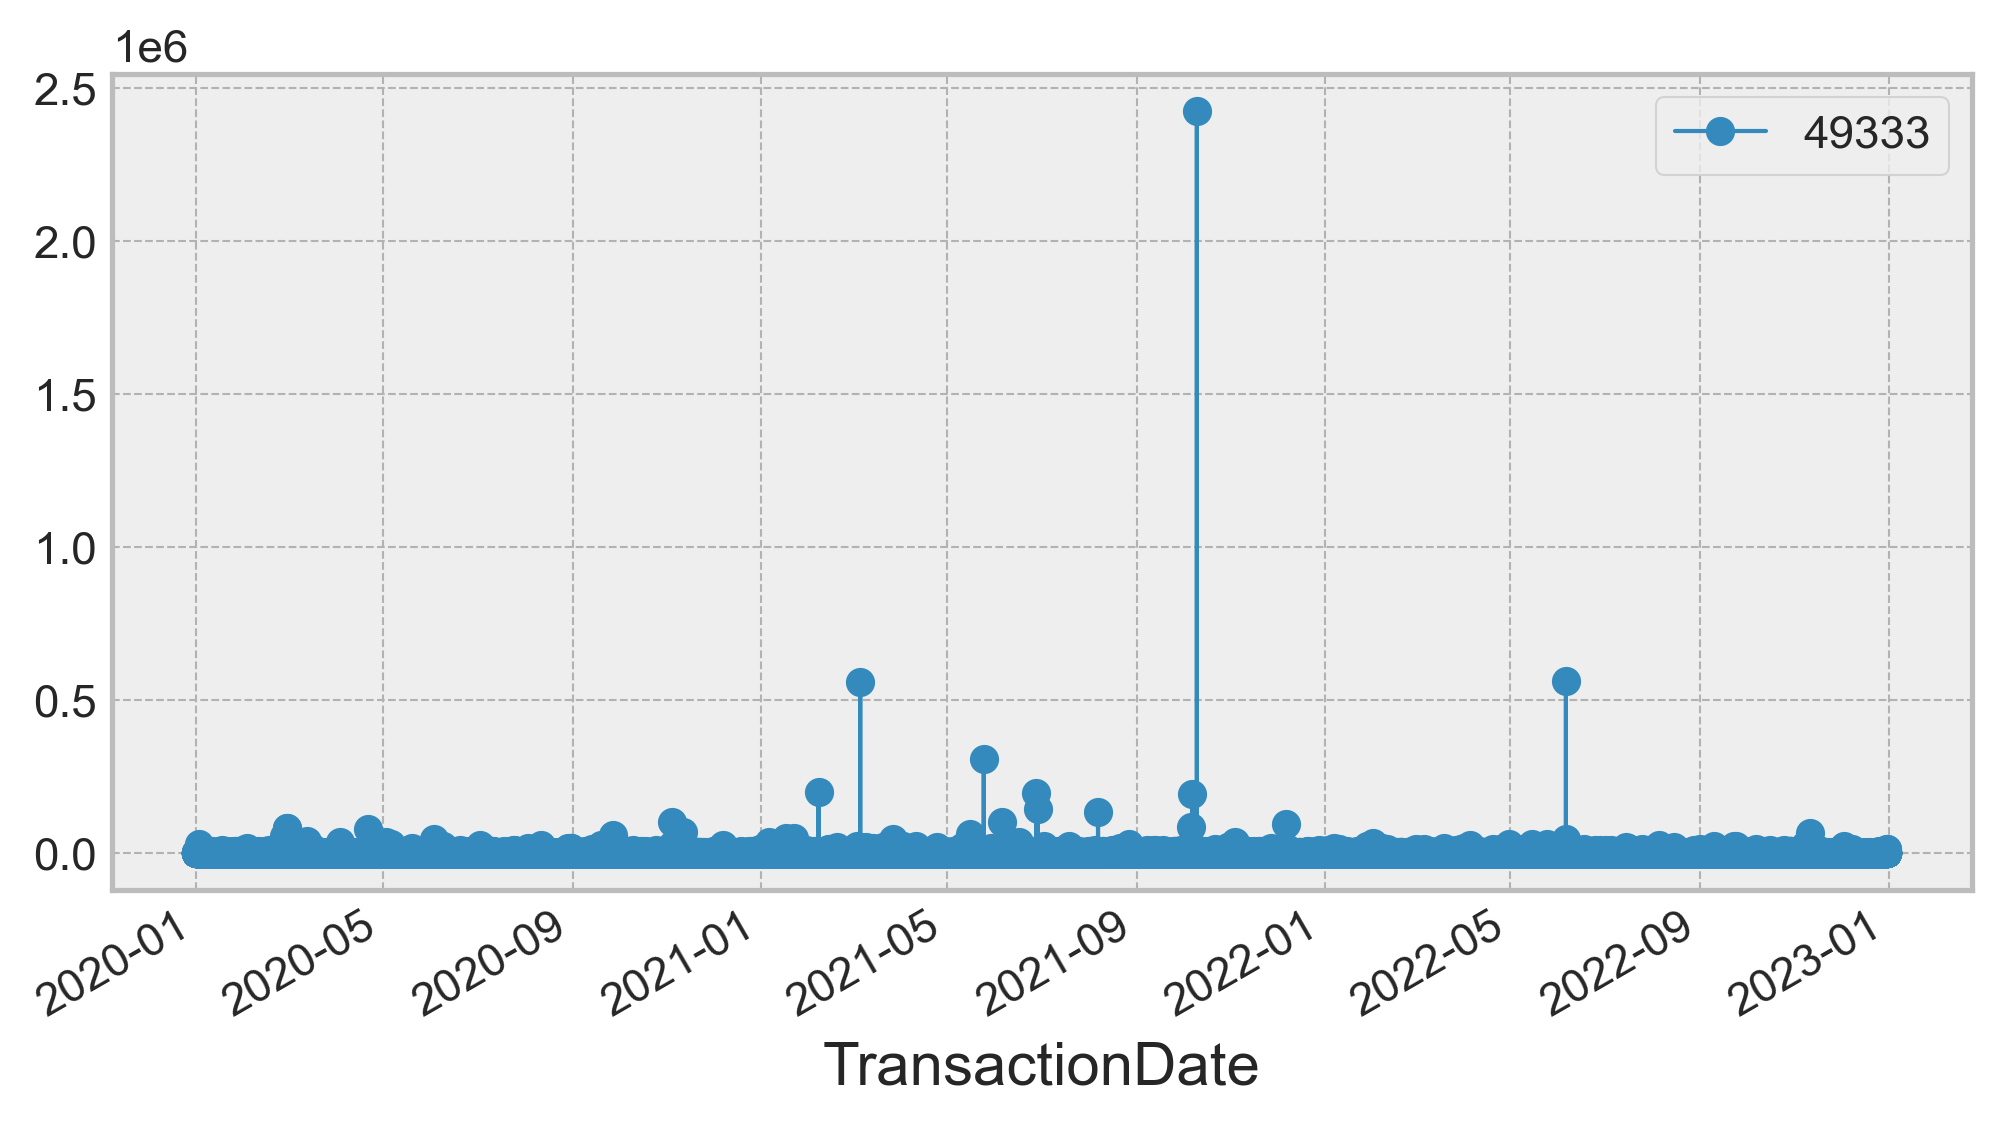

In [150]:
trans_data_promo_store_product_CPI_prodsel49333 = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['ProductKey'] == 49333] 
# trans_data_promo_store_product_CPI_49341.rename(columns = {'trans_sale_amount':'trans_sale_amount49340'})
trans_data_promo_store_product_CPI_prodsel49333.groupby('ProductKey')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
plt.show()

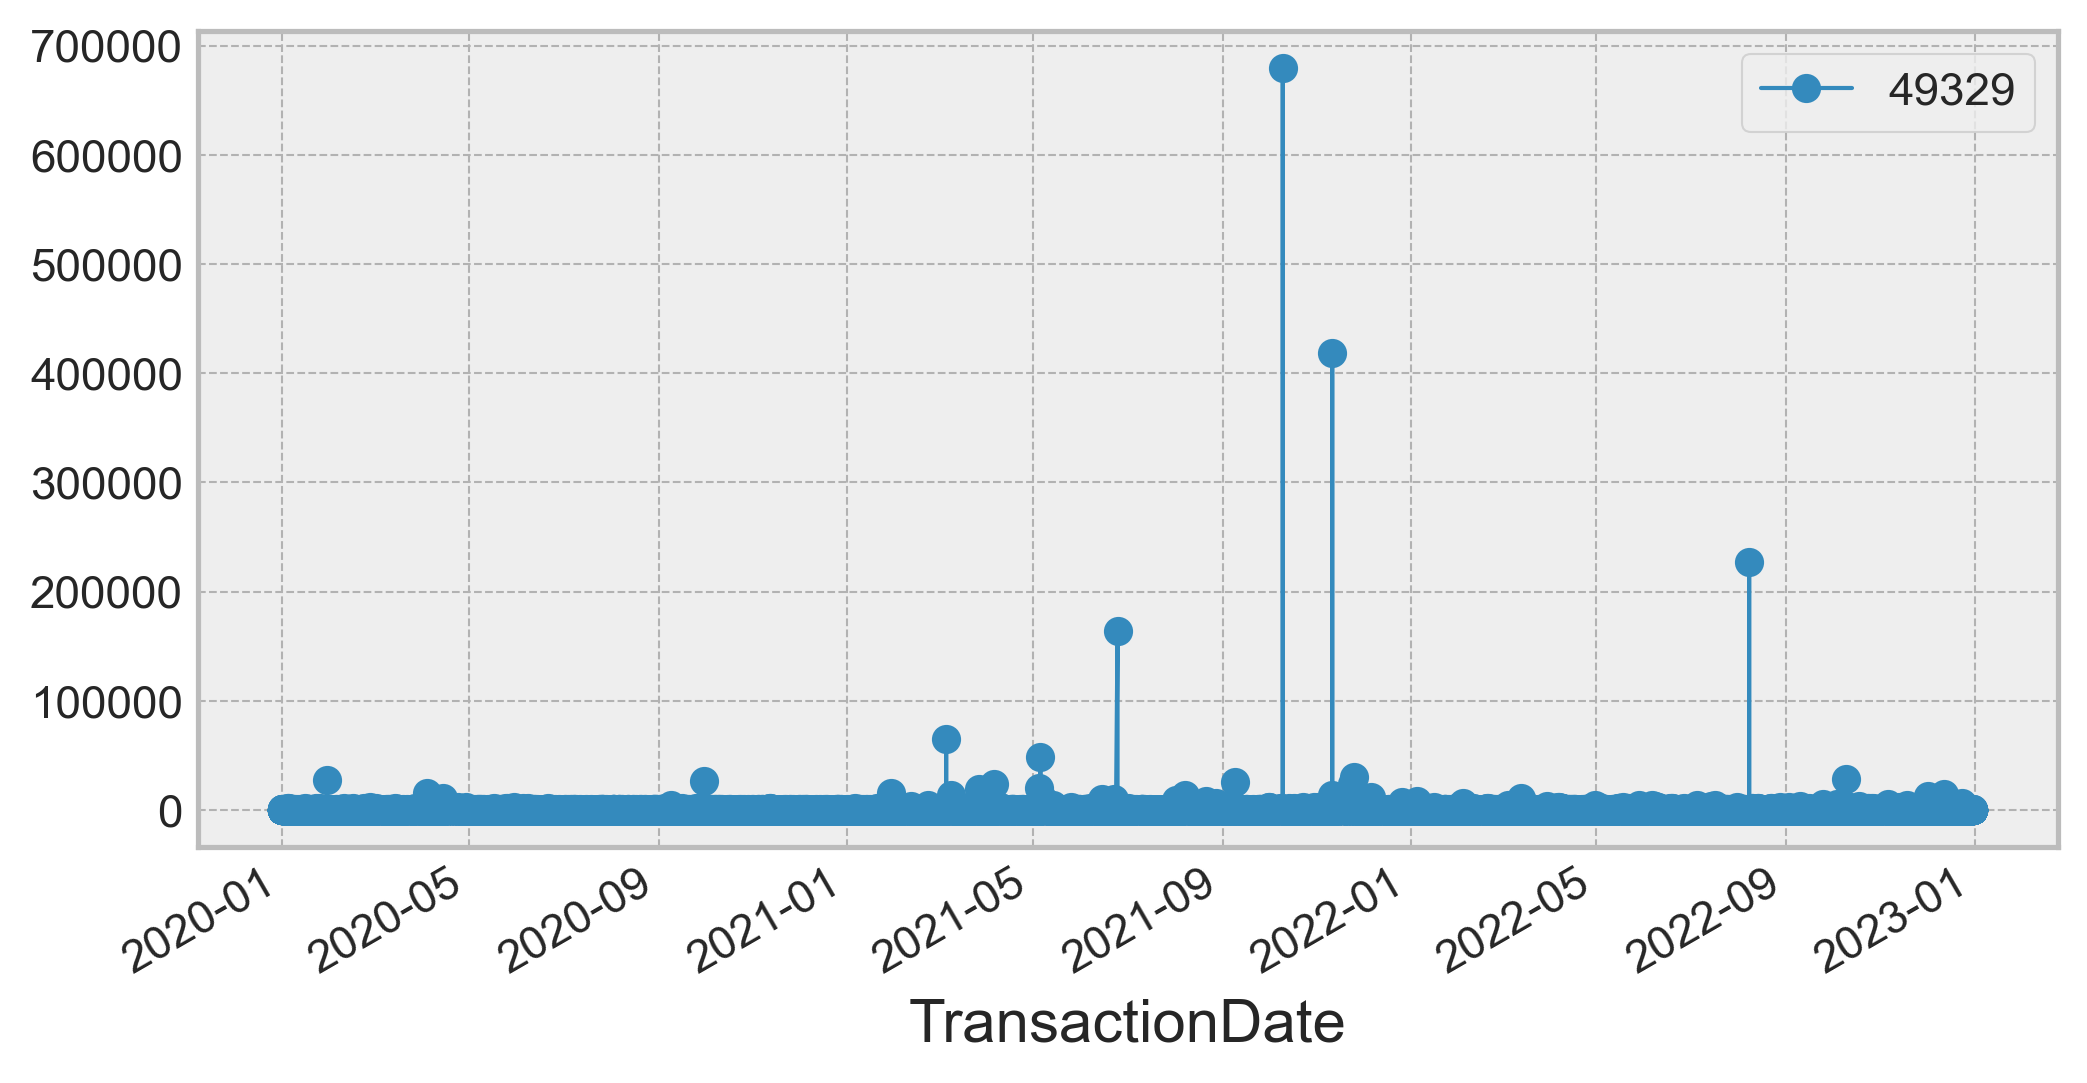

In [151]:
trans_data_promo_store_product_CPI_prodsel49329 = trans_data_promo_store_product_CPI[trans_data_promo_store_product_CPI['ProductKey'] == 49329] 
# trans_data_promo_store_product_CPI_49341.rename(columns = {'trans_sale_amount':'trans_sale_amount49340'})
trans_data_promo_store_product_CPI_prodsel49329.groupby('ProductKey')['Trans_Sale_Amount'].plot(legend=True, marker = 'o', linewidth = 1)
plt.show()
plt.savefig("squares.png")


In [154]:
trans_data_promo_store_product_CPI.to_csv('trans_data_promo_store_product_CPI.csv')